# Importing libraries


In [912]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Load dataset


In [913]:
data = pd.read_csv(r'E:\data science\projact\Telecom Customers Churn\Telecom Customers Churn.csv')


In [914]:
data.head()


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [915]:
data.shape


(7043, 21)

In [916]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [917]:
data.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [918]:
data.describe(include='O')

customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     7590-VHVEG   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043           7043         7043             7043   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              3096           3498         3088             3095   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         7043        7043            7043            7043   
unique           3           3               3               3   
top             No          No              No  Month-to-month   
freq          3473        2810            2785            3875   

       PaperlessBilling     PaymentMethod TotalCharges Churn  
count              7043              7043         7043  7043  
unique                2                 4         6531     2  
top                 Yes  Electronic check                 No  
freq               4171              2365           11  5174

In [919]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [920]:
data.columns.values


array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [921]:
data.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [922]:
data.duplicated().sum()

0

In [923]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [924]:
#replacing missing values of total charges with calculated total charges by multiplying corresponding monthlycharges with tenure 
for i in range(len(data['TotalCharges'])):
    if pd.isnull(data['TotalCharges'].iloc[i]):
        tot_charges=data['MonthlyCharges'].iloc[i] * data['tenure'].iloc[i]
        data['TotalCharges'].iloc[i]=tot_charges
data['TotalCharges'].isnull().sum()

C:\Users\AL-MOSTAFA\AppData\Local\Temp\ipykernel_18372\4072957365.py:5: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\AL-MOSTAFA\AppData\Local\Temp\ipykernel_18372\4072957365.py:5: SettingWithCopyWarning:


A value is trying to be s

0

In [925]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [926]:
gender_count= data['gender'].value_counts()
gender_count

gender
Male      3555
Female    3488
Name: count, dtype: int64

## EDA

In [927]:
churned_customers = data[data['Churn'] == 'Yes']

In [928]:
churned_by_gender = churned_customers.groupby('gender').size().reset_index(name='Total Churned')

# Data Visualization 



In [929]:
gender_count= data['gender'].value_counts()
gender_count

gender
Male      3555
Female    3488
Name: count, dtype: int64

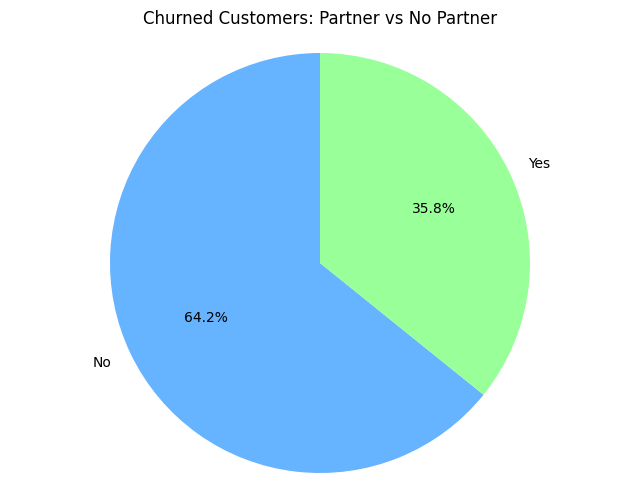

In [930]:
churned_by_partner = churned_customers['Partner'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(churned_by_partner, labels=churned_by_partner.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99'], startangle=90)
plt.title('Churned Customers: Partner vs No Partner')
plt.axis('equal')  
plt.show()


In [931]:
payment_count = churned_customers['PaymentMethod'].value_counts()
print(payment_count)


PaymentMethod
Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: count, dtype: int64


In [932]:
contract_count = churned_customers['Contract'].value_counts()
contract_count

Contract
Month-to-month    1655
One year           166
Two year            48
Name: count, dtype: int64

C:\Users\AL-MOSTAFA\AppData\Local\Temp\ipykernel_18372\4003434003.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




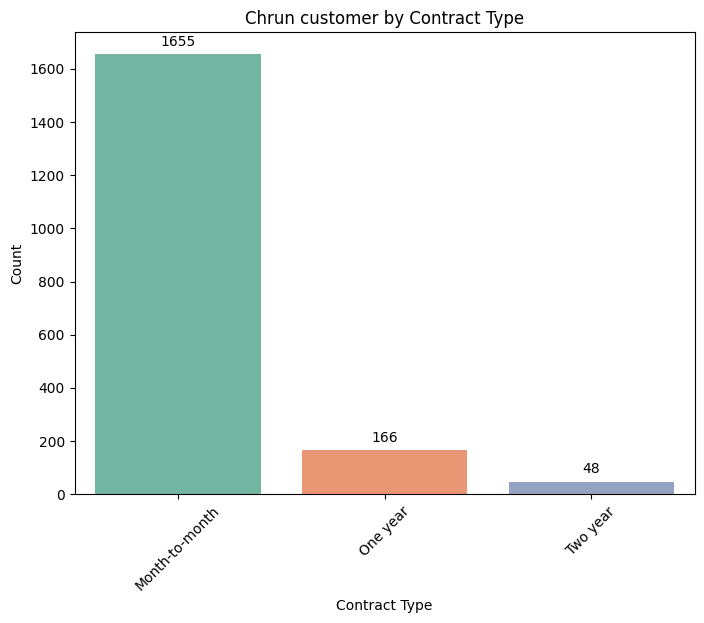

In [933]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x=contract_count.index,y=contract_count.values,palette='Set2')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9),  
                textcoords='offset points')

plt.title('Chrun customer by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [934]:
churned_customers['tenure'].unique()

array([ 2,  8, 28, 49, 10,  1, 47, 17,  5, 34, 11, 15, 18,  9,  7, 12, 25,
       68, 55, 37,  3, 27, 20,  4, 58, 53, 13,  6, 19, 59, 16, 52, 24, 32,
       38, 54, 43, 63, 21, 69, 22, 61, 60, 48, 40, 23, 39, 35, 56, 65, 33,
       30, 45, 46, 62, 70, 50, 44, 71, 26, 14, 41, 66, 64, 29, 42, 67, 51,
       31, 57, 36, 72], dtype=int64)

In [935]:
bins = [0, 12, 24, 36,48,60, churned_customers['tenure'].max()]
labels = ['0-12 Months', '12-24 Months', '24-36 Months', '36-48 Months', '48-60 Months', '>60 Months']
churned_customers['tenure_group'] = pd.cut(churned_customers['tenure'], bins=bins, labels=labels)


C:\Users\AL-MOSTAFA\AppData\Local\Temp\ipykernel_18372\2282201019.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [936]:
grouped = churned_customers.groupby('tenure_group').size().reset_index(name='total_churned_customers')


C:\Users\AL-MOSTAFA\AppData\Local\Temp\ipykernel_18372\1336662673.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



C:\Users\AL-MOSTAFA\AppData\Local\Temp\ipykernel_18372\766590743.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




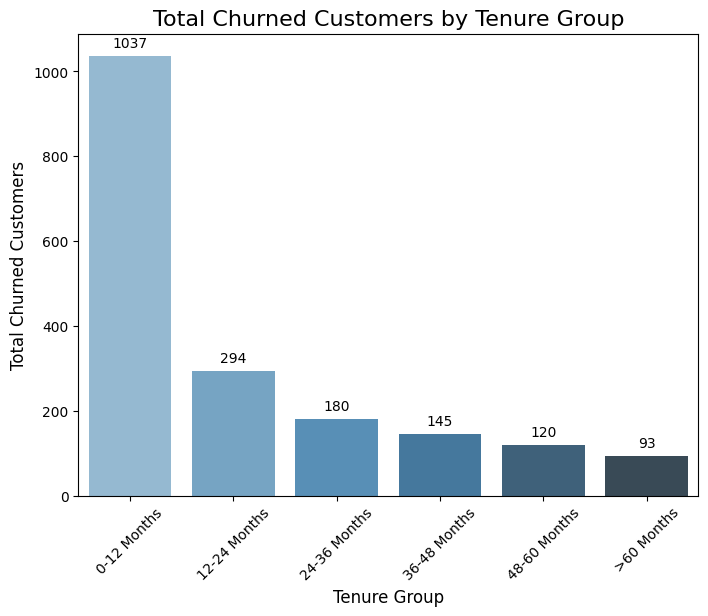

In [937]:
plt.figure(figsize=(8,6))
sns.barplot(x='tenure_group', y='total_churned_customers', data=grouped, palette='Blues_d')

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', xytext=(0, 9), 
                       textcoords='offset points')

plt.title('Total Churned Customers by Tenure Group', fontsize=16)
plt.xlabel('Tenure Group', fontsize=12)
plt.ylabel('Total Churned Customers', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [938]:
InternetService_count =  churned_customers['InternetService'].value_counts()
InternetService_count

InternetService
Fiber optic    1297
DSL             459
No              113
Name: count, dtype: int64

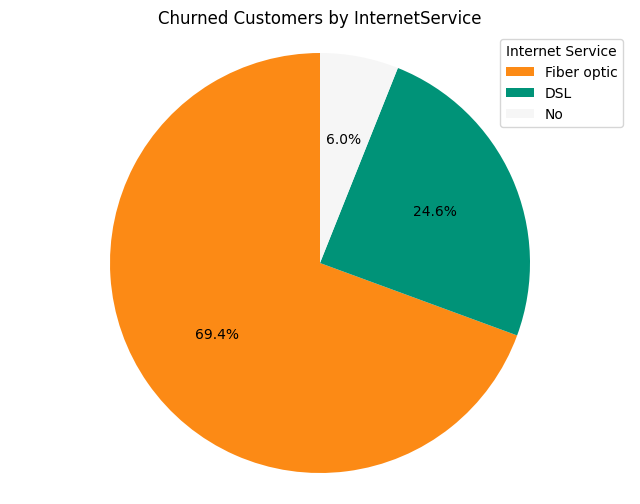

In [939]:
plt.figure(figsize=(8, 6))
plt.pie(InternetService_count, labels=None, autopct='%1.1f%%', colors=['#FC8A15','#009378','#F6F6F6'], startangle=90)
plt.legend(InternetService_count.index, title="Internet Service", loc="best")
plt.title('Churned Customers by InternetService')
plt.axis('equal')  
plt.show()


In [940]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce') 

In [941]:
churned_customers = data[data['Churn'] == 'Yes']

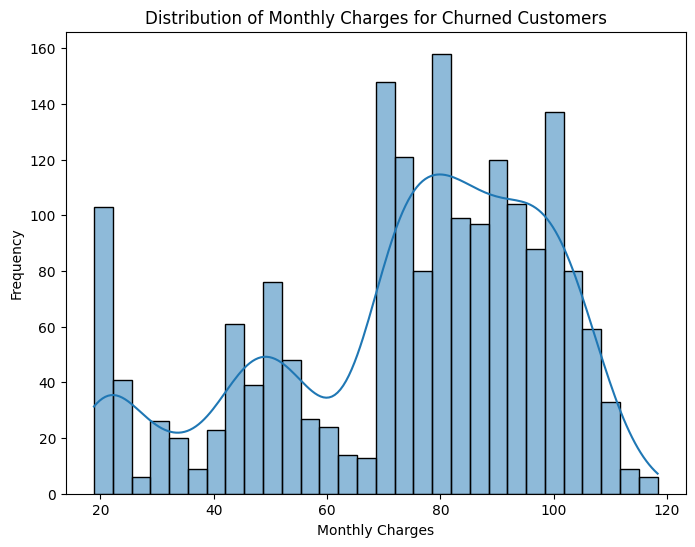

In [942]:
plt.figure(figsize=(8, 6))
sns.histplot(churned_customers['MonthlyCharges'], bins=30, kde=True)
plt.title('Distribution of Monthly Charges for Churned Customers')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

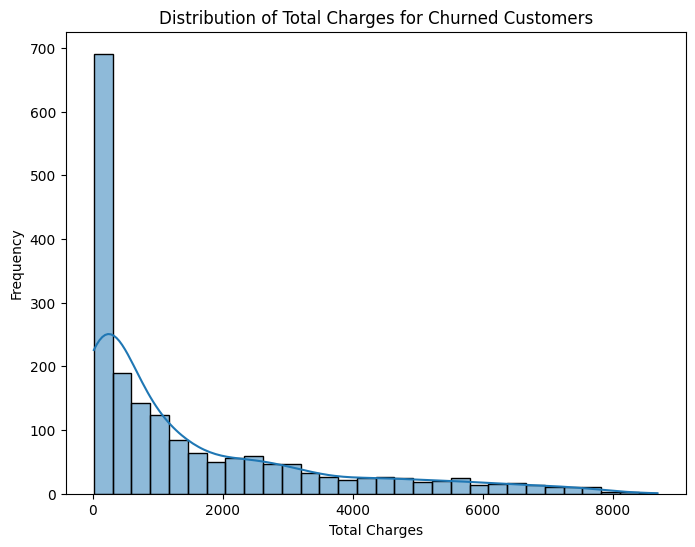

In [943]:
plt.figure(figsize=(8, 6))
sns.histplot(churned_customers['TotalCharges'], bins=30, kde=True)
plt.title('Distribution of Total Charges for Churned Customers')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

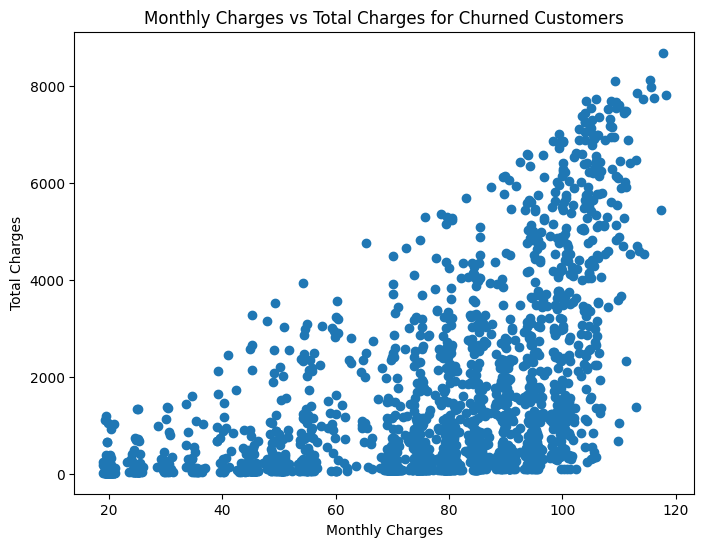

In [944]:
plt.figure(figsize=(8, 6))
plt.scatter(churned_customers['MonthlyCharges'], churned_customers['TotalCharges'])
plt.title('Monthly Charges vs Total Charges for Churned Customers')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()

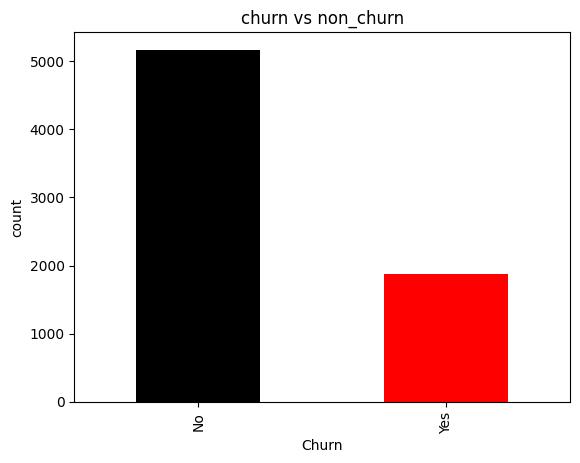

In [945]:
data['Churn'].value_counts().plot(kind='bar' , color=['black','red'])
plt.ylabel("count")
plt.title("churn vs non_churn")
plt.show()


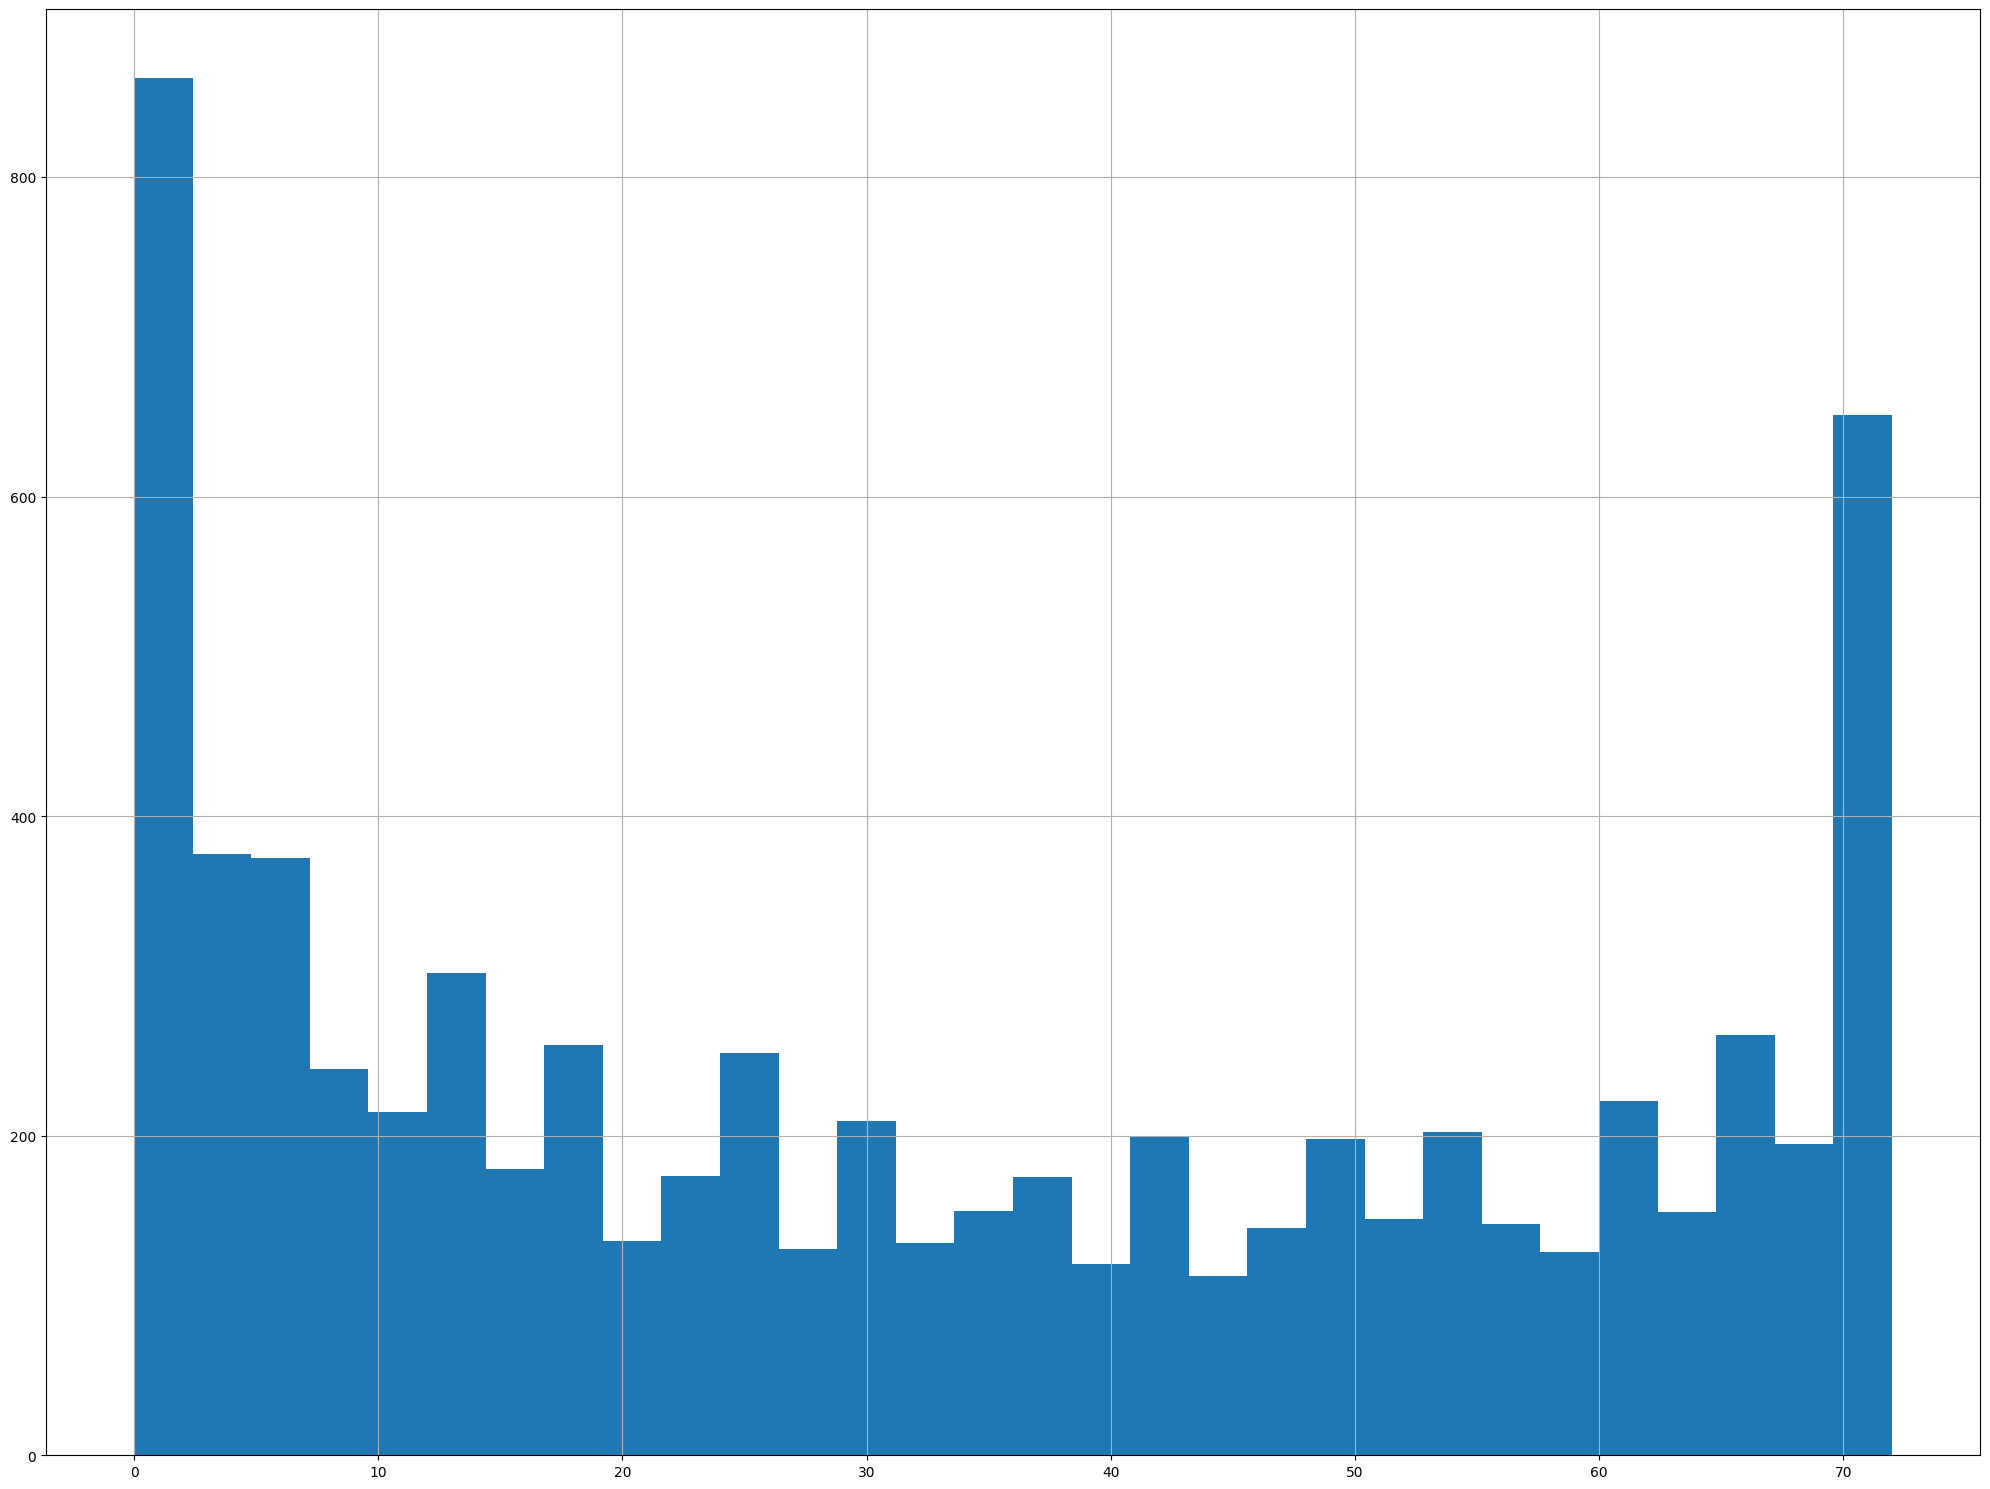

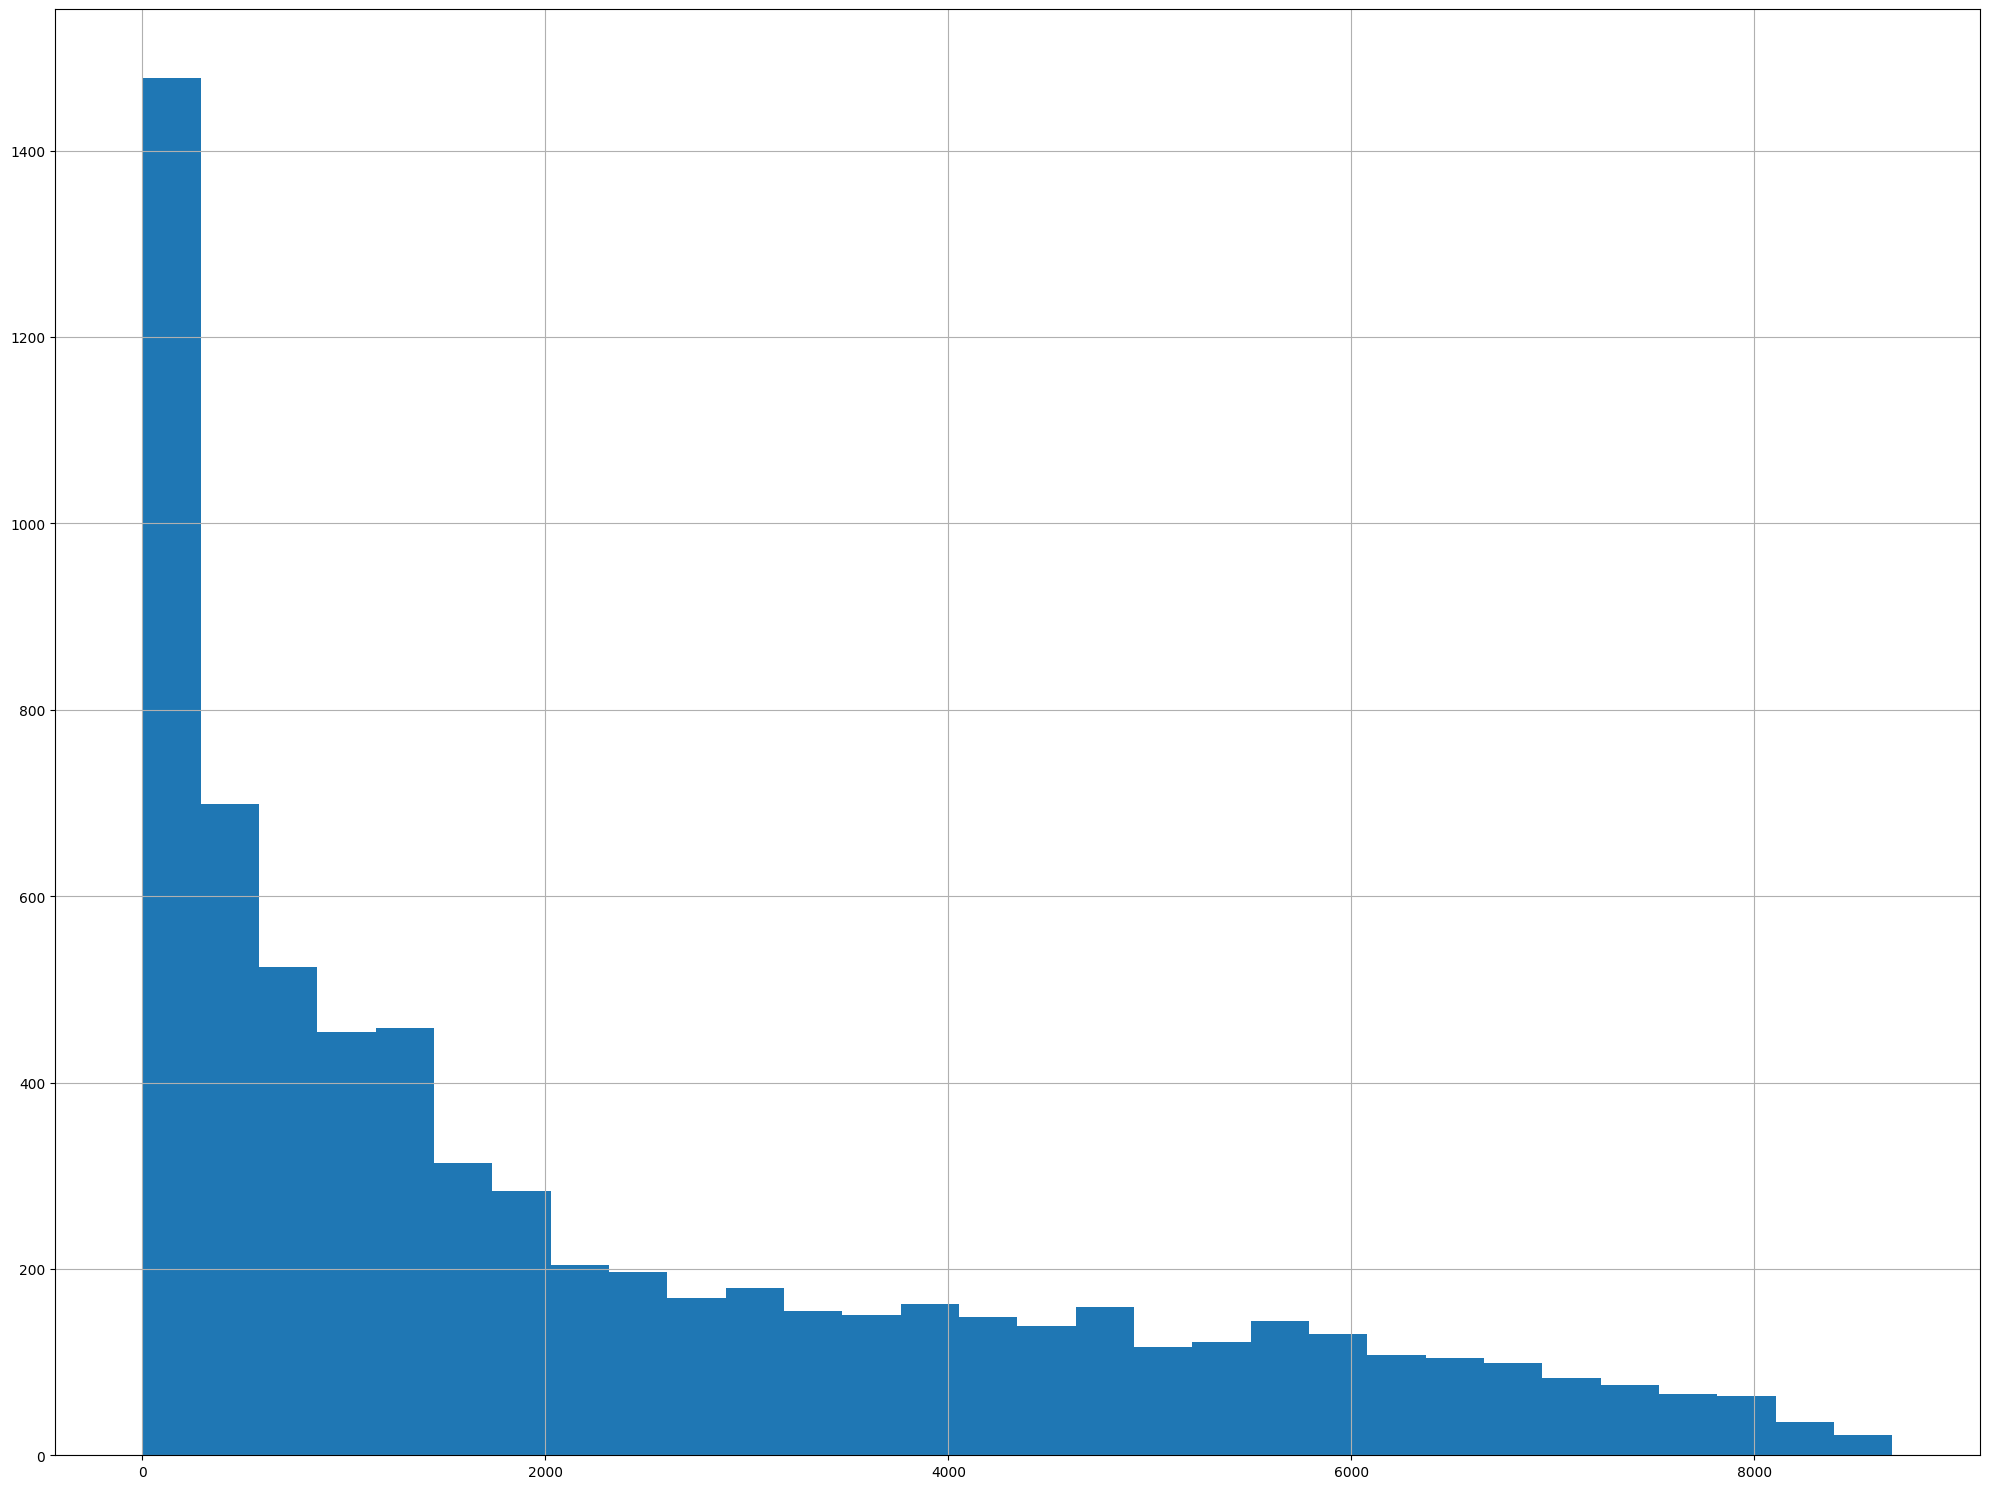

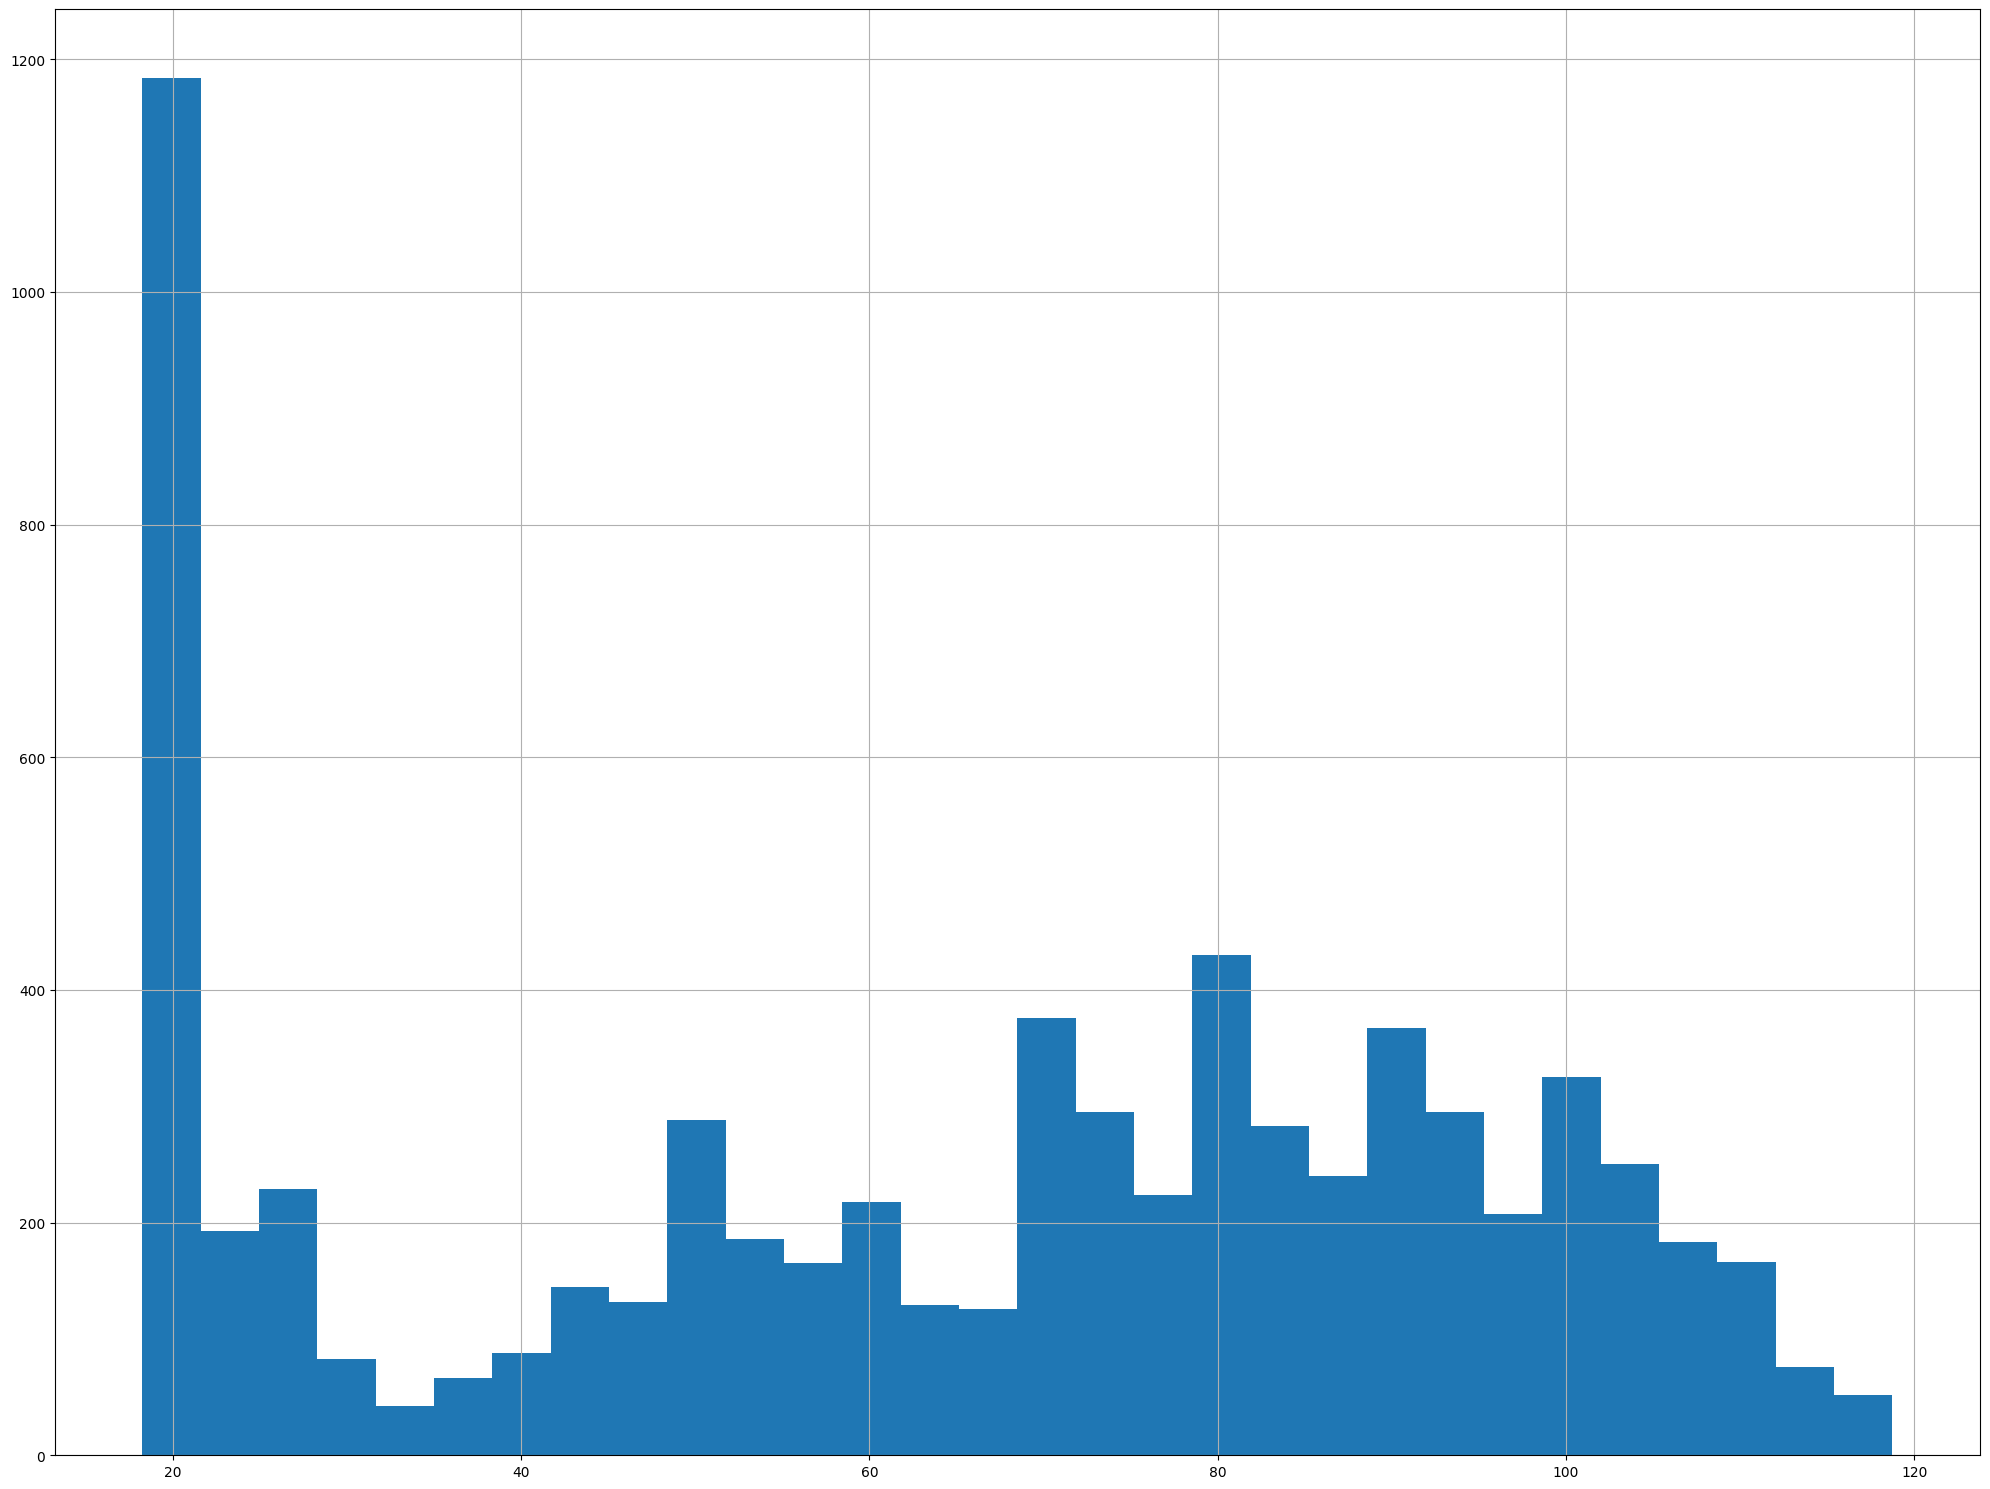

In [946]:
num = data[['tenure', 'TotalCharges', 'MonthlyCharges']]
for col in num:
    num[col].hist(bins=30, figsize=(20, 15))
    plt.tight_layout()
    plt.show()

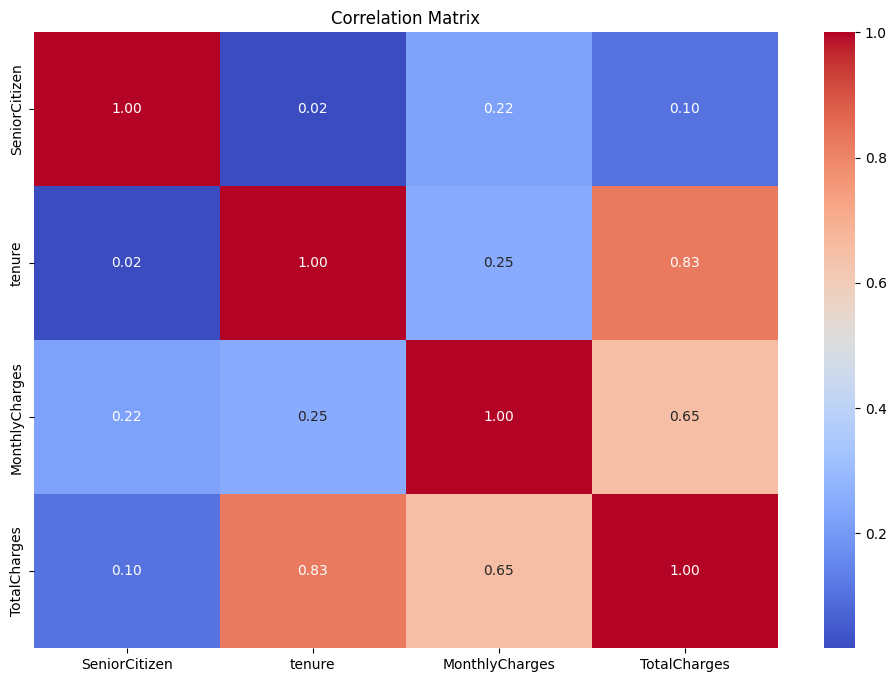

In [947]:
numeric_data = data.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
correlation = numeric_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


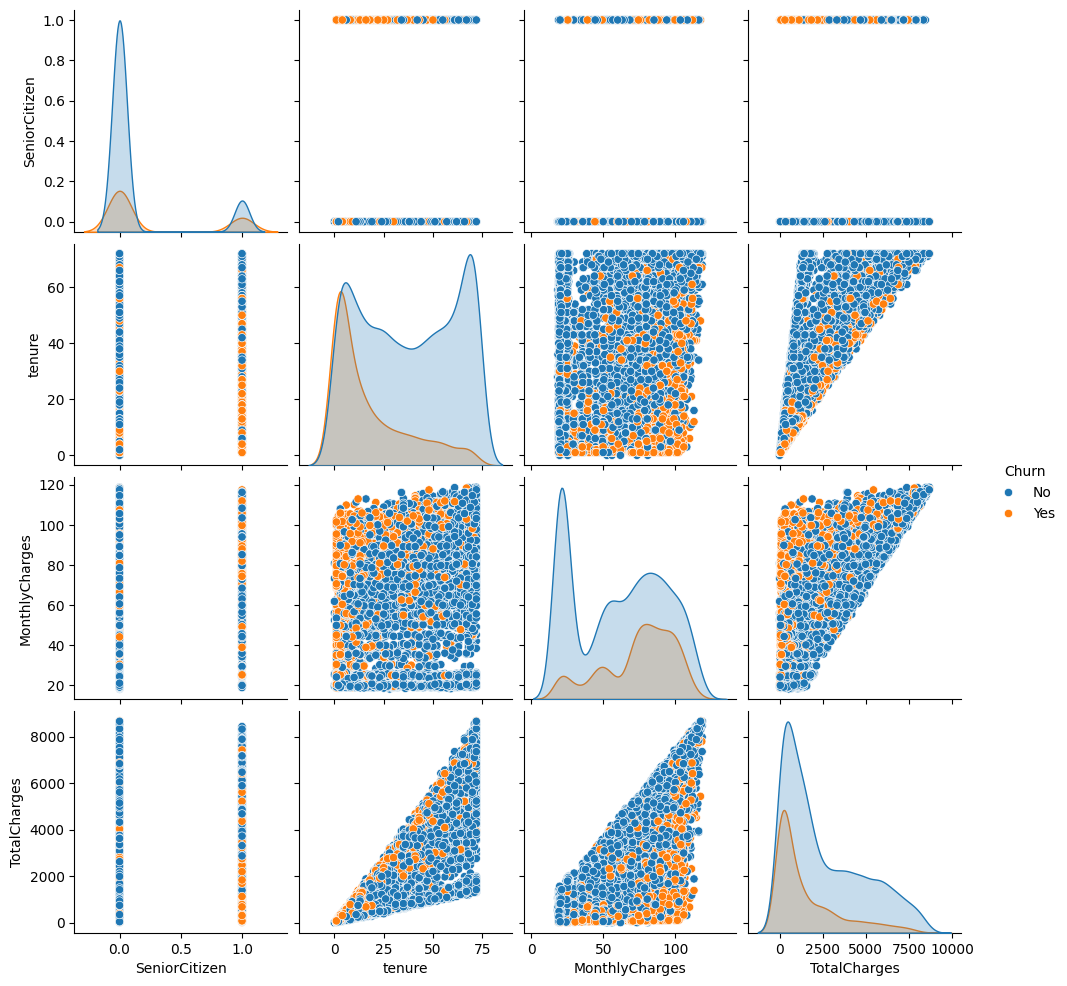

In [948]:
sns.pairplot(data, hue='Churn', diag_kind='kde')
plt.show()

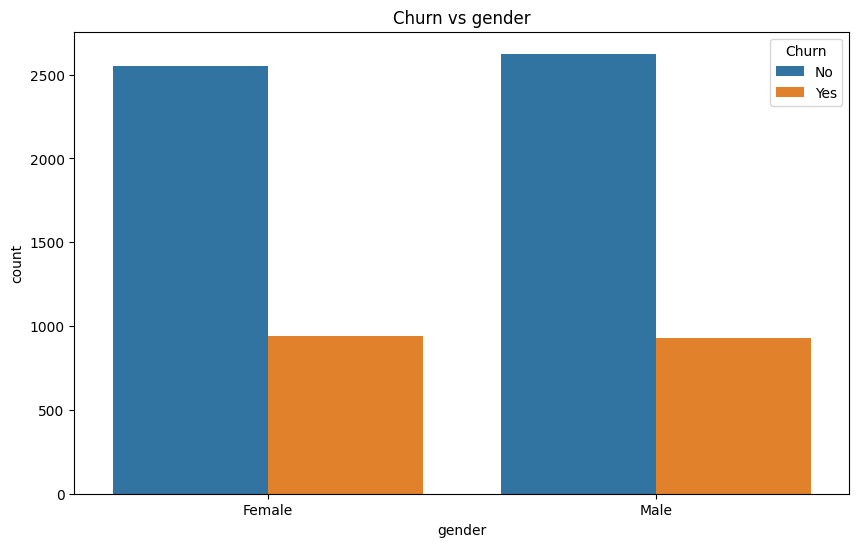

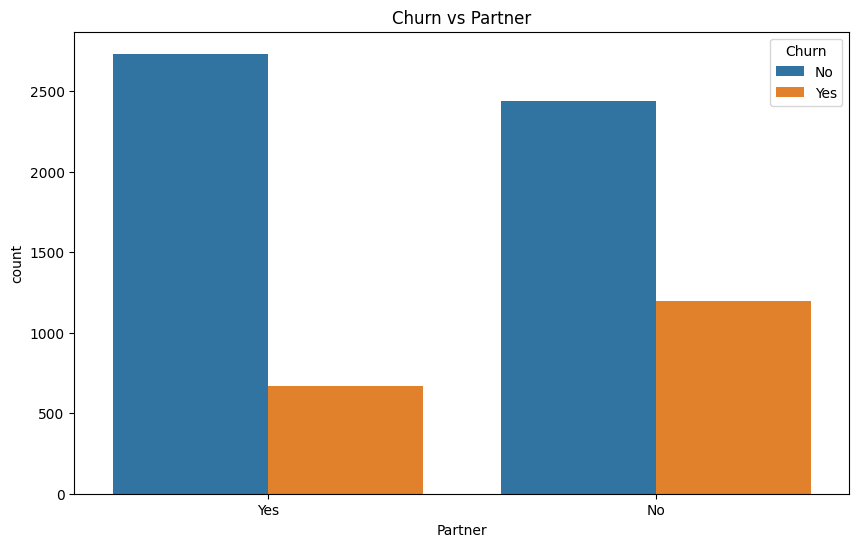

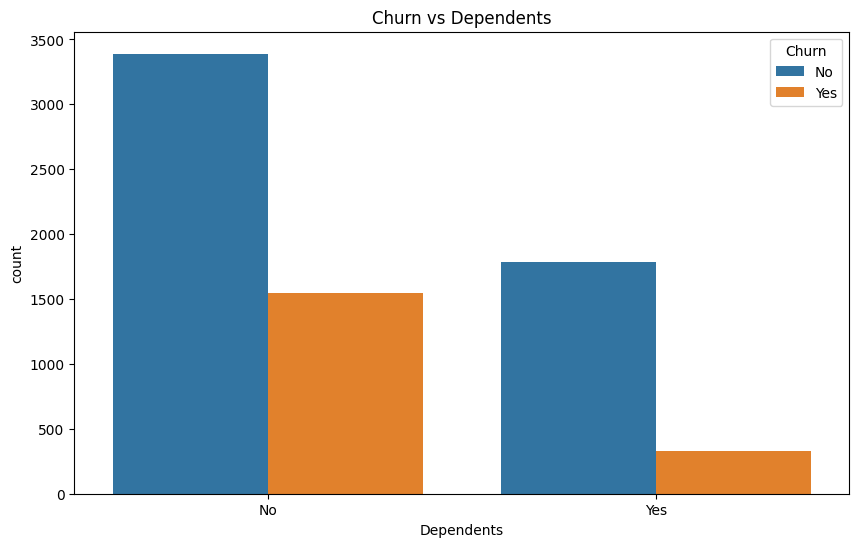

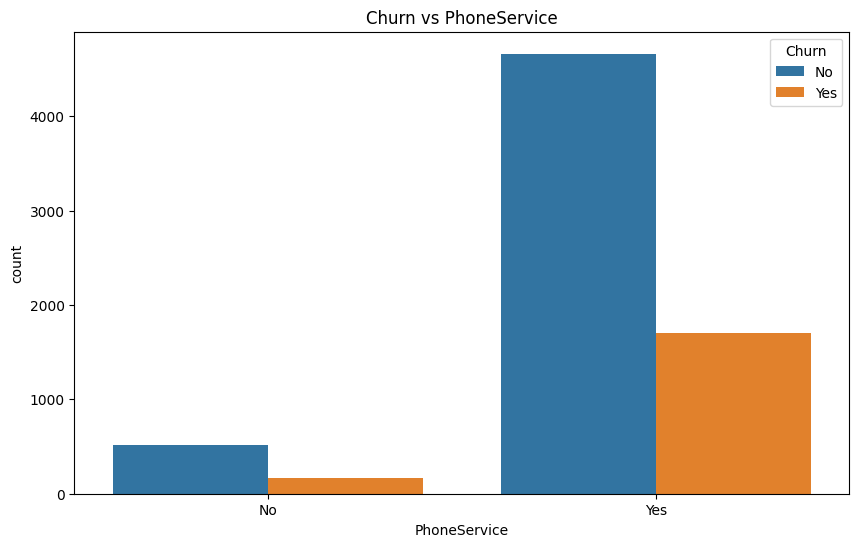

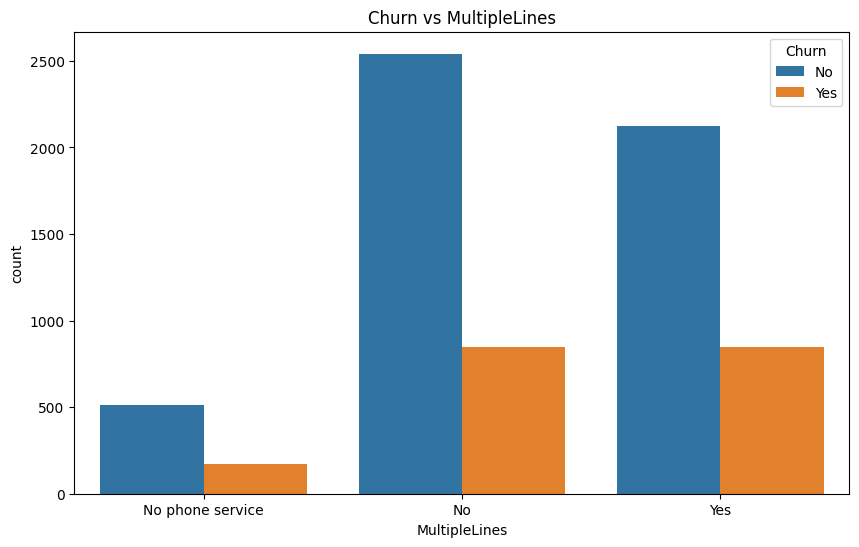

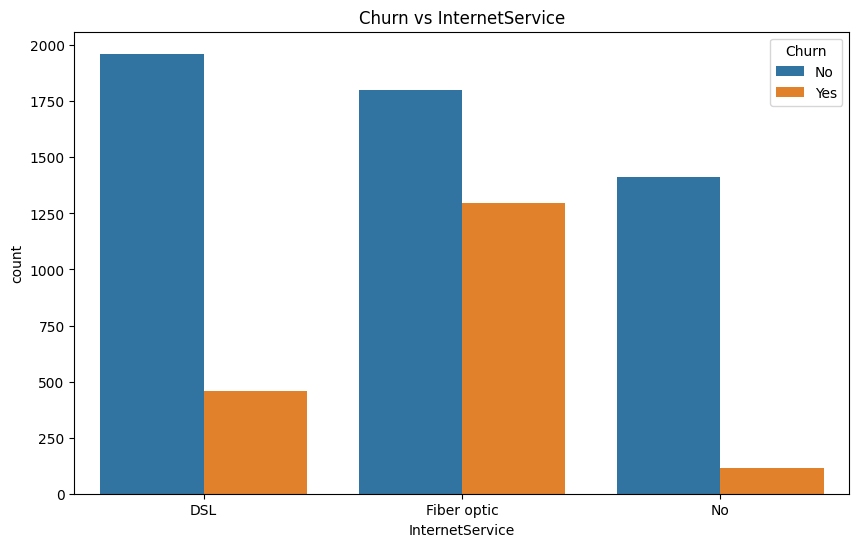

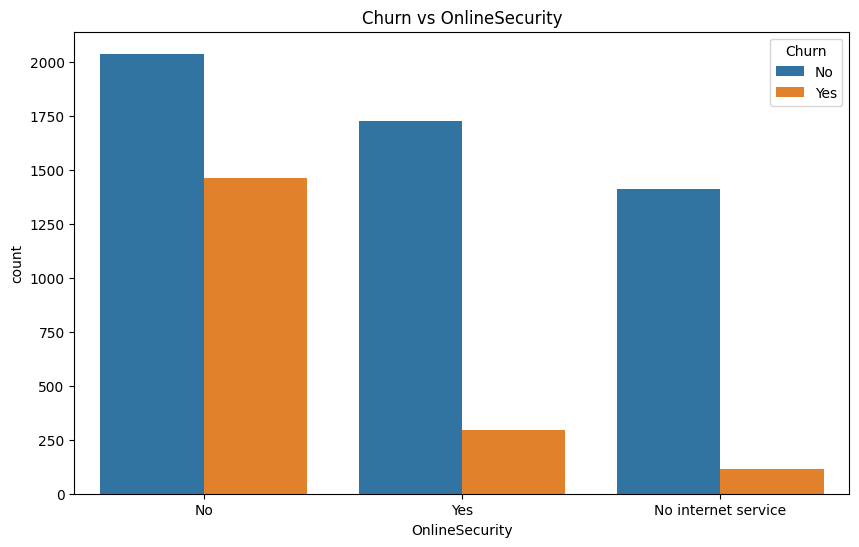

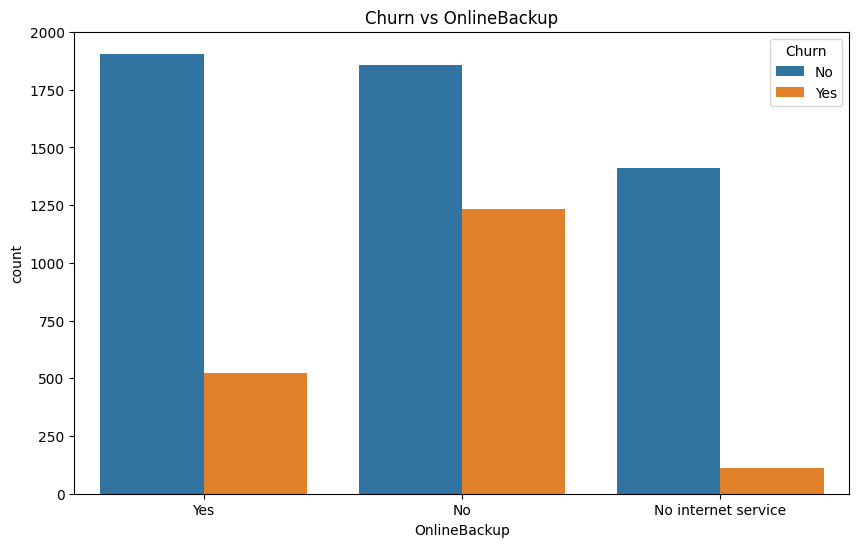

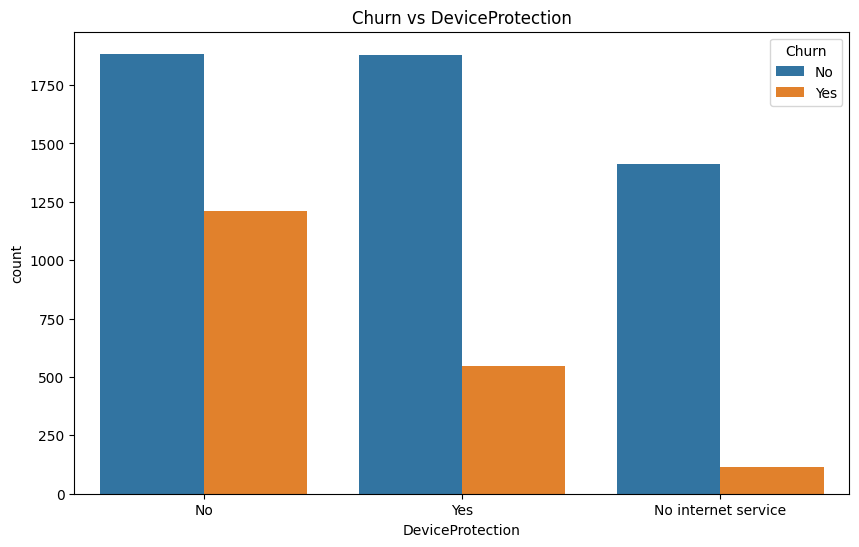

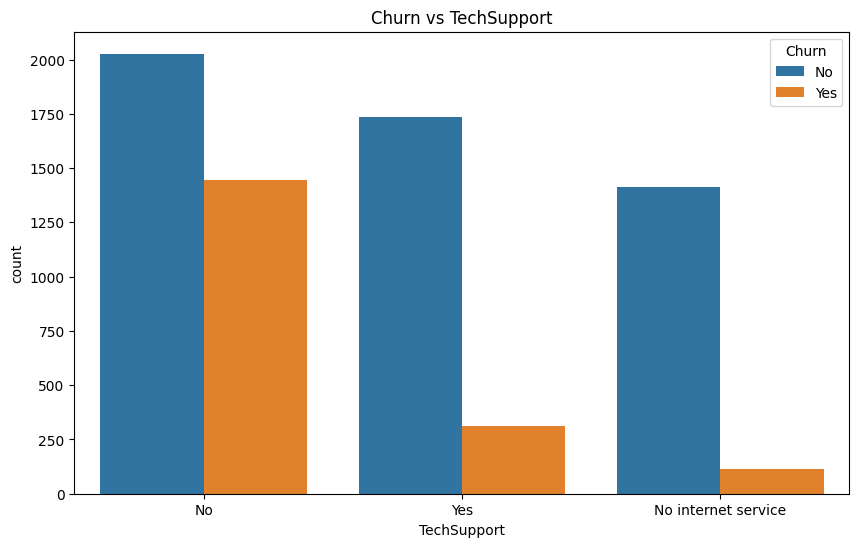

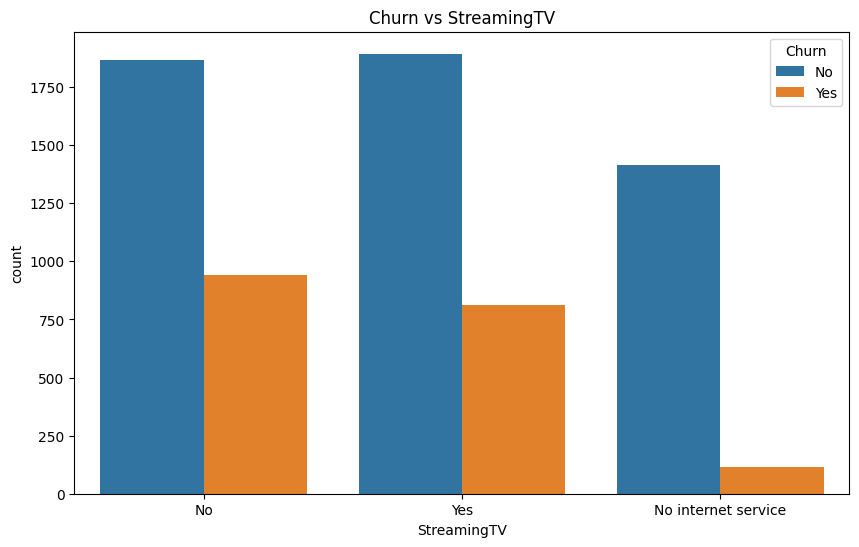

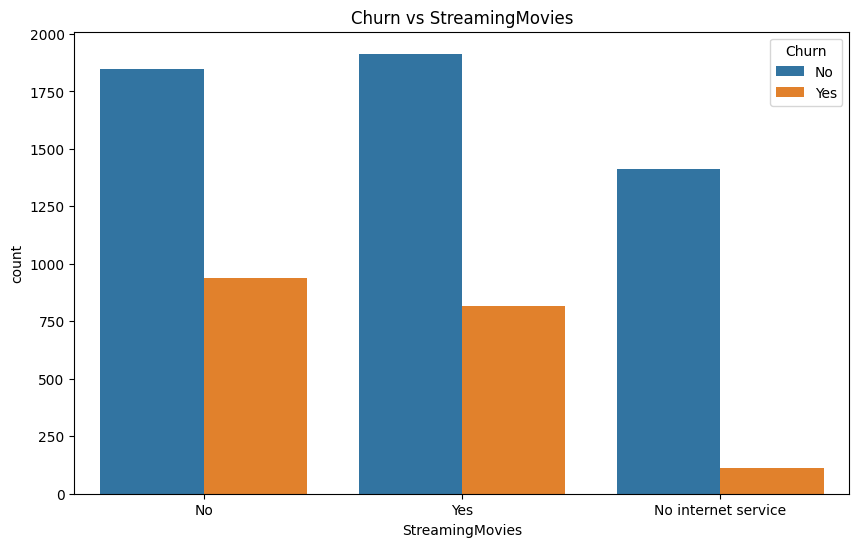

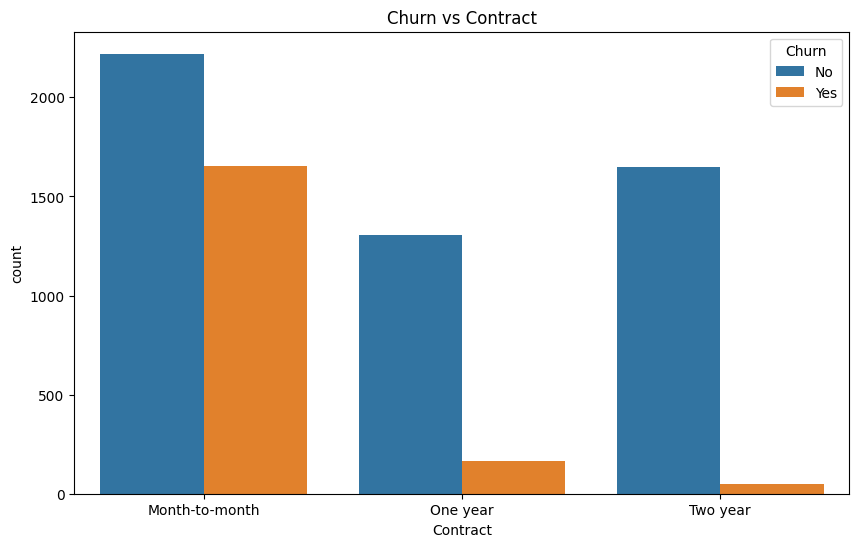

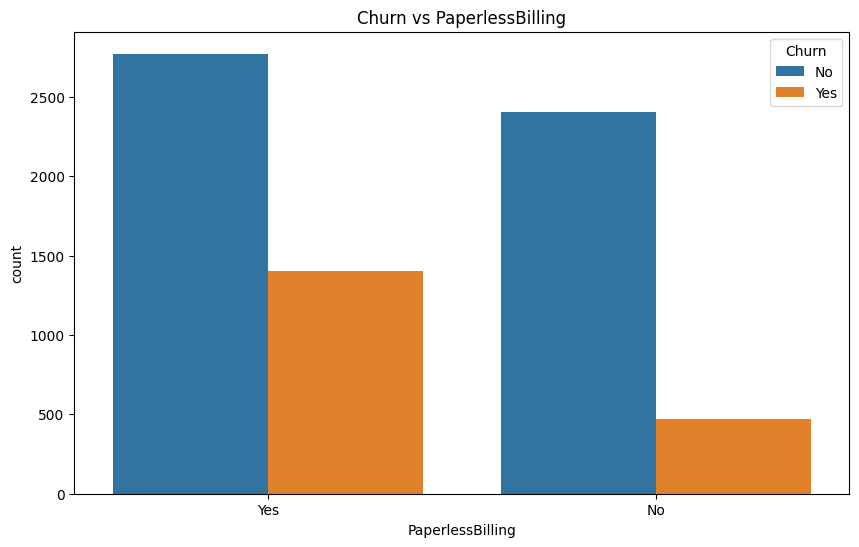

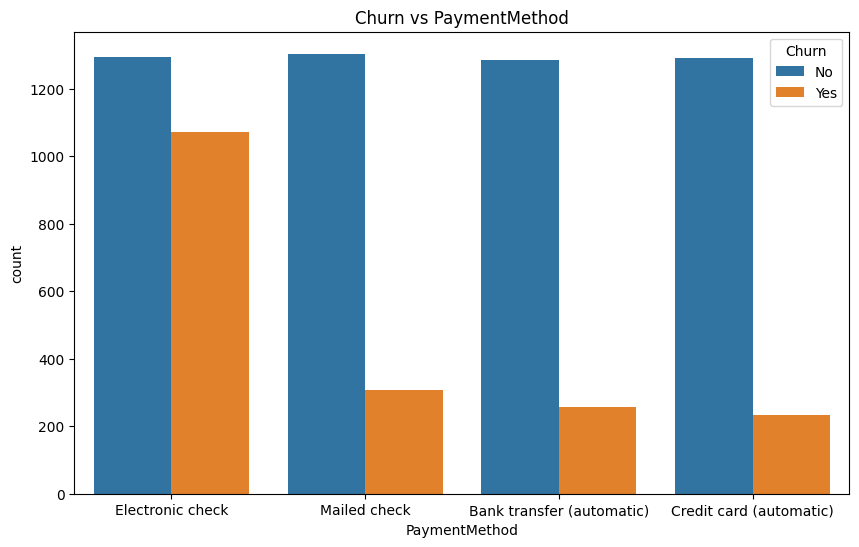

In [949]:
exc = ['customerID', 'Churn'] 
for column in data.select_dtypes(include=['object']).columns:
    if column not in exc:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column, hue='Churn', data=data)
        plt.title(f'Churn vs {column}')
        plt.show()
        

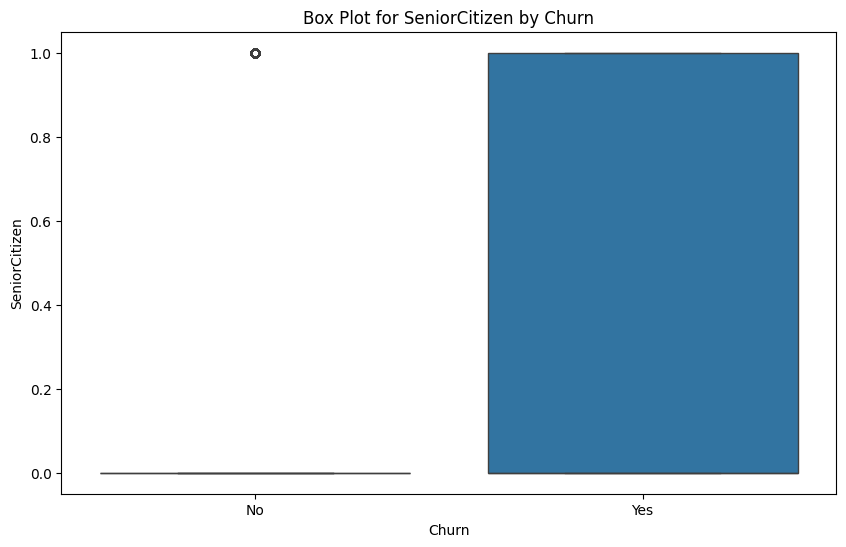

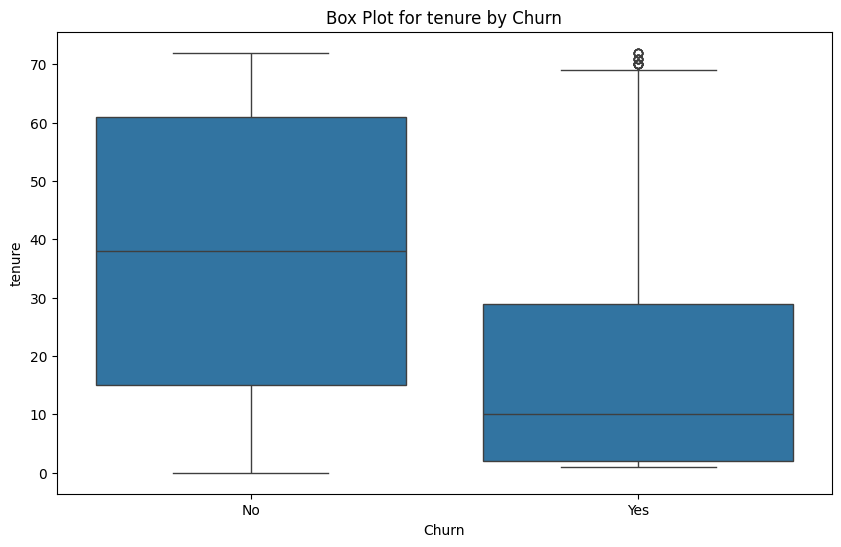

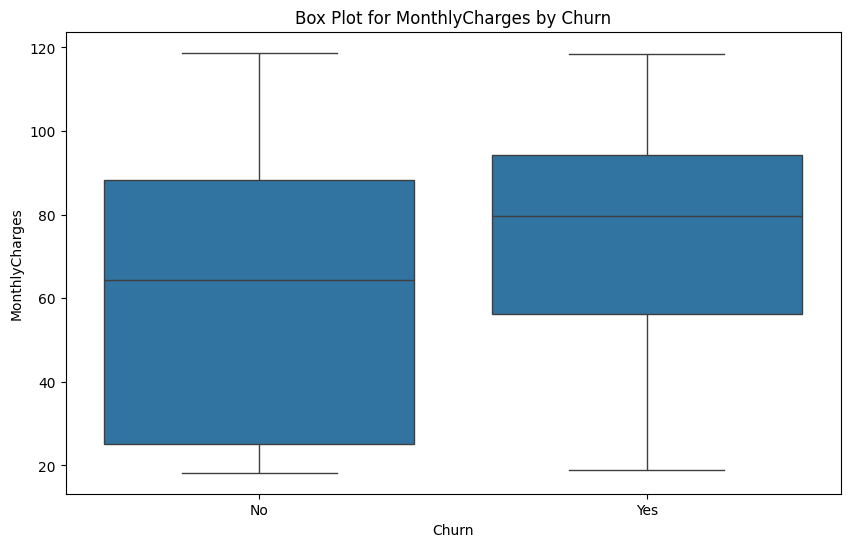

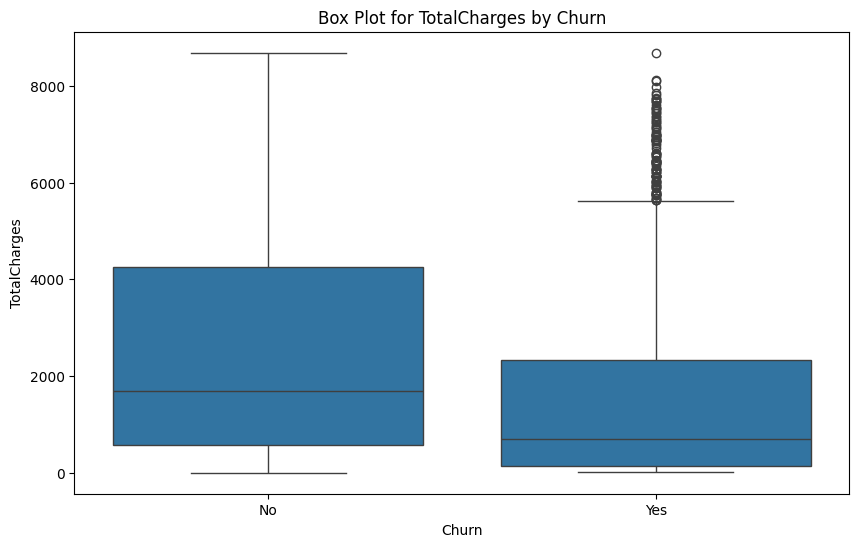

In [950]:
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Churn', y=column, data=data)
    plt.title(f'Box Plot for {column} by Churn')
    plt.show()

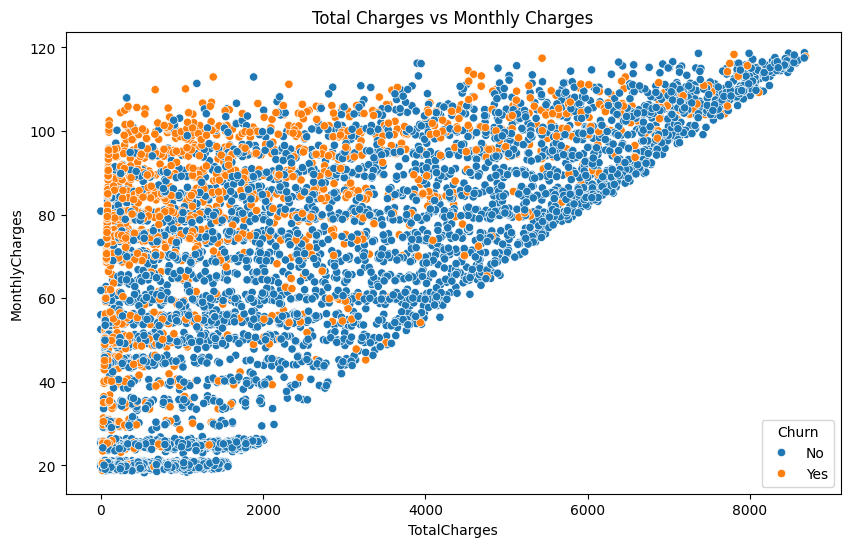

In [951]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalCharges', y='MonthlyCharges', hue='Churn', data=data)
plt.title('Total Charges vs Monthly Charges')
plt.show()

In [952]:
c_labels = ['No', 'Yes']
g_labels = ['Male', 'Female']  

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=g_labels, values=[50, 50], name="Gender"), 1, 1)

fig.add_trace(go.Pie(labels=c_labels, values=[70, 30], name="Churn"), 1, 2)

fig.update_layout(title_text="Gender and Churn Distribution")
fig.show()


In [953]:
data["Churn"][data["Churn"]=="No"].groupby(by=data["gender"]).count()


gender
Female    2549
Male      2625
Name: Churn, dtype: int64

In [954]:
data["Churn"][data["Churn"]=="Yes"].groupby(by=data["gender"]).count()


gender
Female    939
Male      930
Name: Churn, dtype: int64

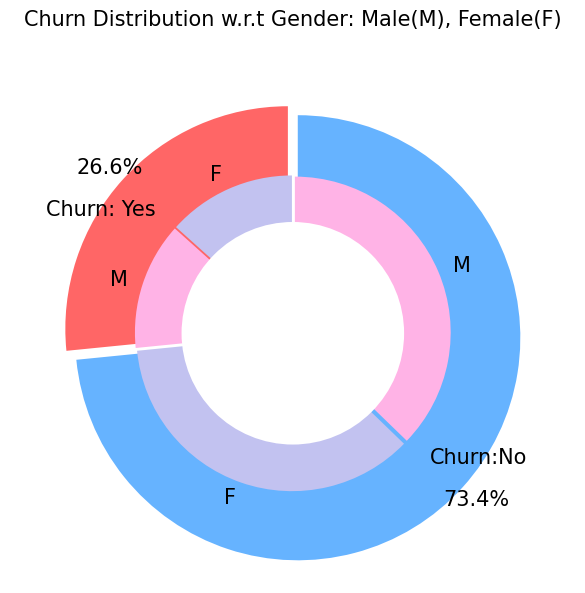

In [955]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1) 
plt.axis('equal')
plt.tight_layout()
plt.show()

In [956]:
fig = px.histogram(data, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [957]:
labels = data['PaymentMethod'].unique()
values = data['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [958]:
fig = px.histogram(data, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [959]:
data["InternetService"].unique()


array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [960]:
data[data["gender"]=="Male"][["InternetService", "Churn"]].value_counts()


InternetService  Churn
DSL              No       993
Fiber optic      No       910
No               No       722
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
Name: count, dtype: int64

In [961]:
data[data["gender"]=="Female"][["InternetService", "Churn"]].value_counts()


InternetService  Churn
DSL              No       969
Fiber optic      No       889
No               No       691
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
Name: count, dtype: int64

In [962]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

In [963]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(data, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [964]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(data, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [965]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(data, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [966]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(data, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [967]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(data, x="Churn", color="PaperlessBilling",  title="<b>Chrun distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [968]:
fig = px.histogram(data, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [969]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(data, x="Churn", color="PhoneService", title="<b>Chrun distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [970]:
fig = px.box(data, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

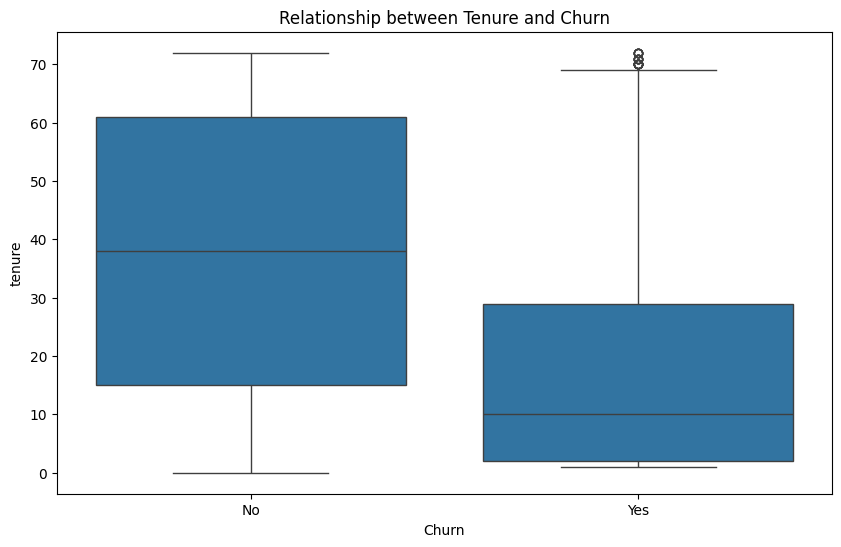

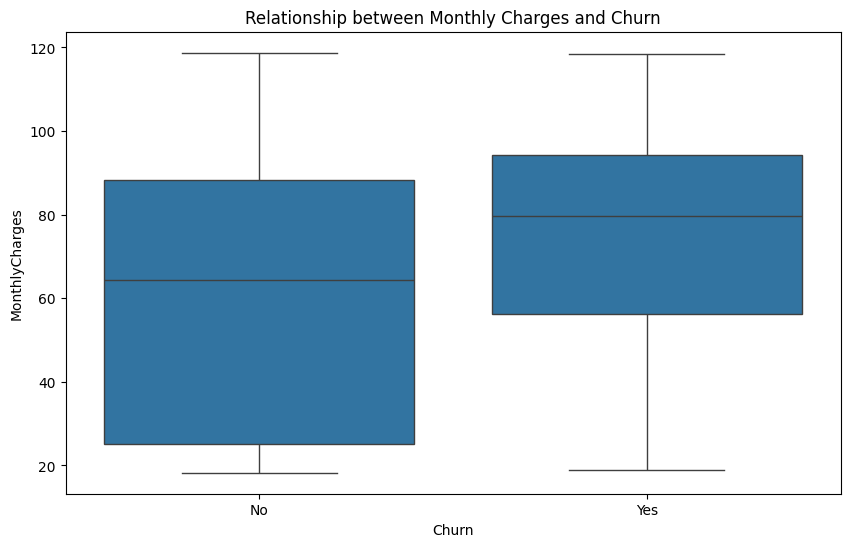

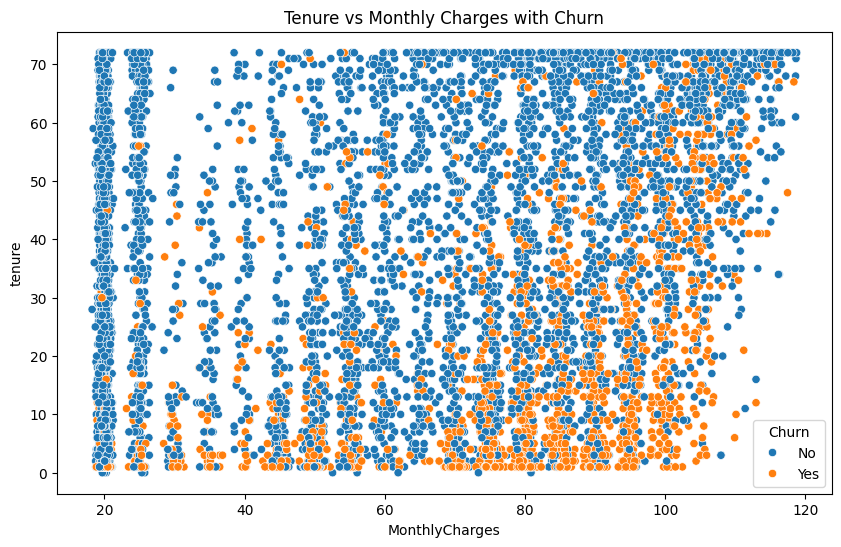

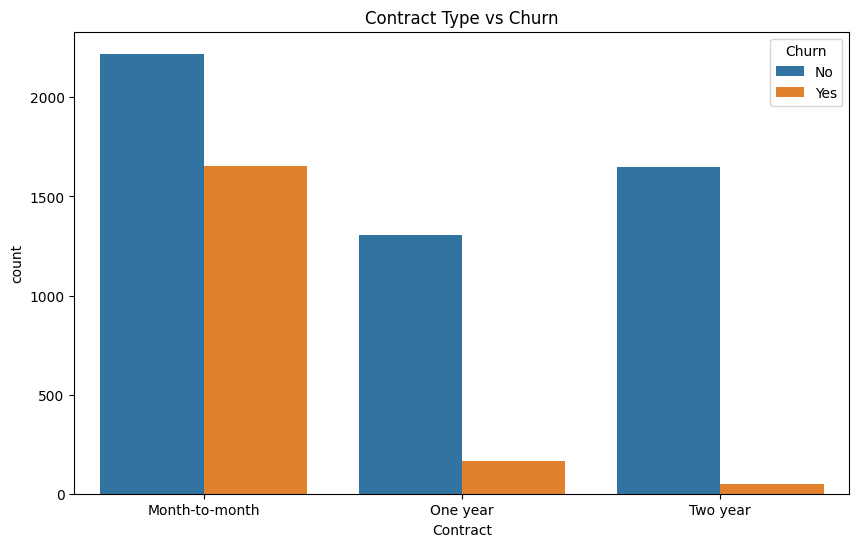

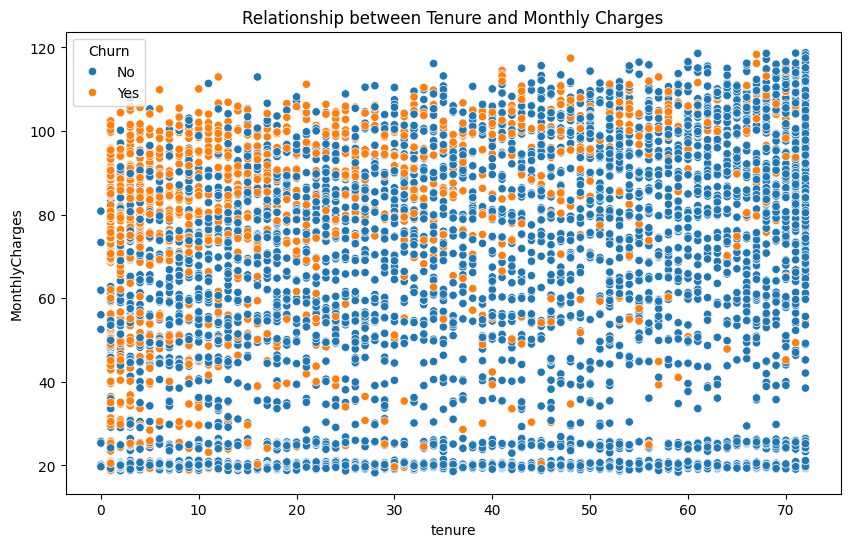

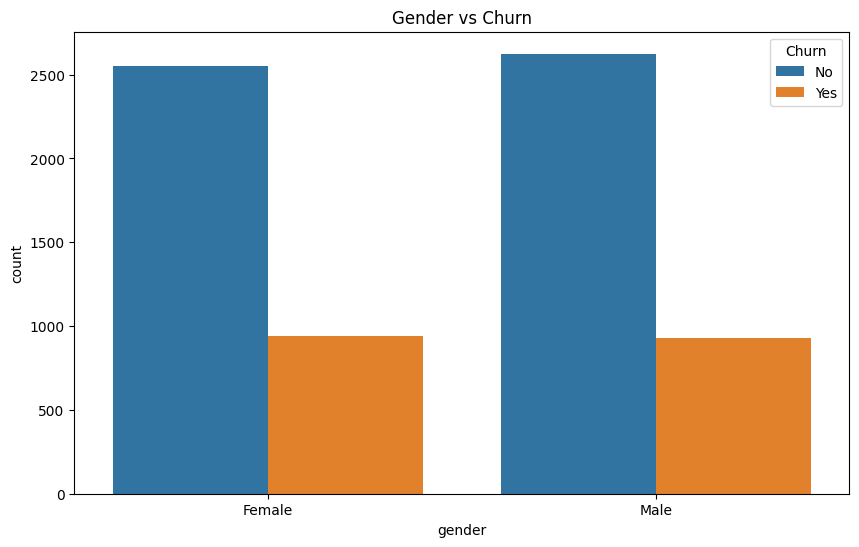

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

In [971]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title('Relationship between Tenure and Churn')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Relationship between Monthly Charges and Churn')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyCharges', y='tenure', hue='Churn', data=data)
plt.title('Tenure vs Monthly Charges with Churn')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title('Contract Type vs Churn')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=data)
plt.title('Relationship between Tenure and Monthly Charges')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='Churn', data=data)
plt.title('Gender vs Churn')
plt.show()
plt.figure(figsize=(15,8))


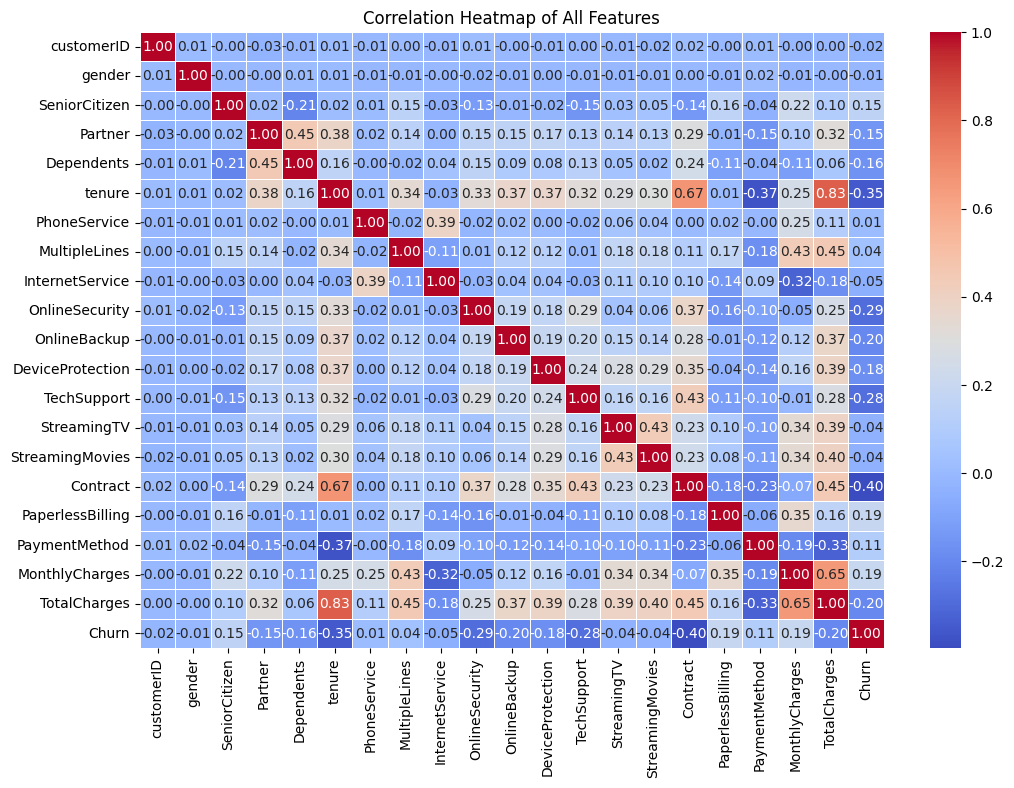

In [972]:
label_encoder = LabelEncoder()
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of All Features')
plt.show()

# 1. Data Preprocessing


In [973]:
data['MultipleLines'].value_counts()

MultipleLines
0    3390
2    2971
1     682
Name: count, dtype: int64

In [974]:
data['MultipleLines'] = data['MultipleLines'].replace('No phone service', 'No')

In [975]:
service_columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'PaperlessBilling'
]

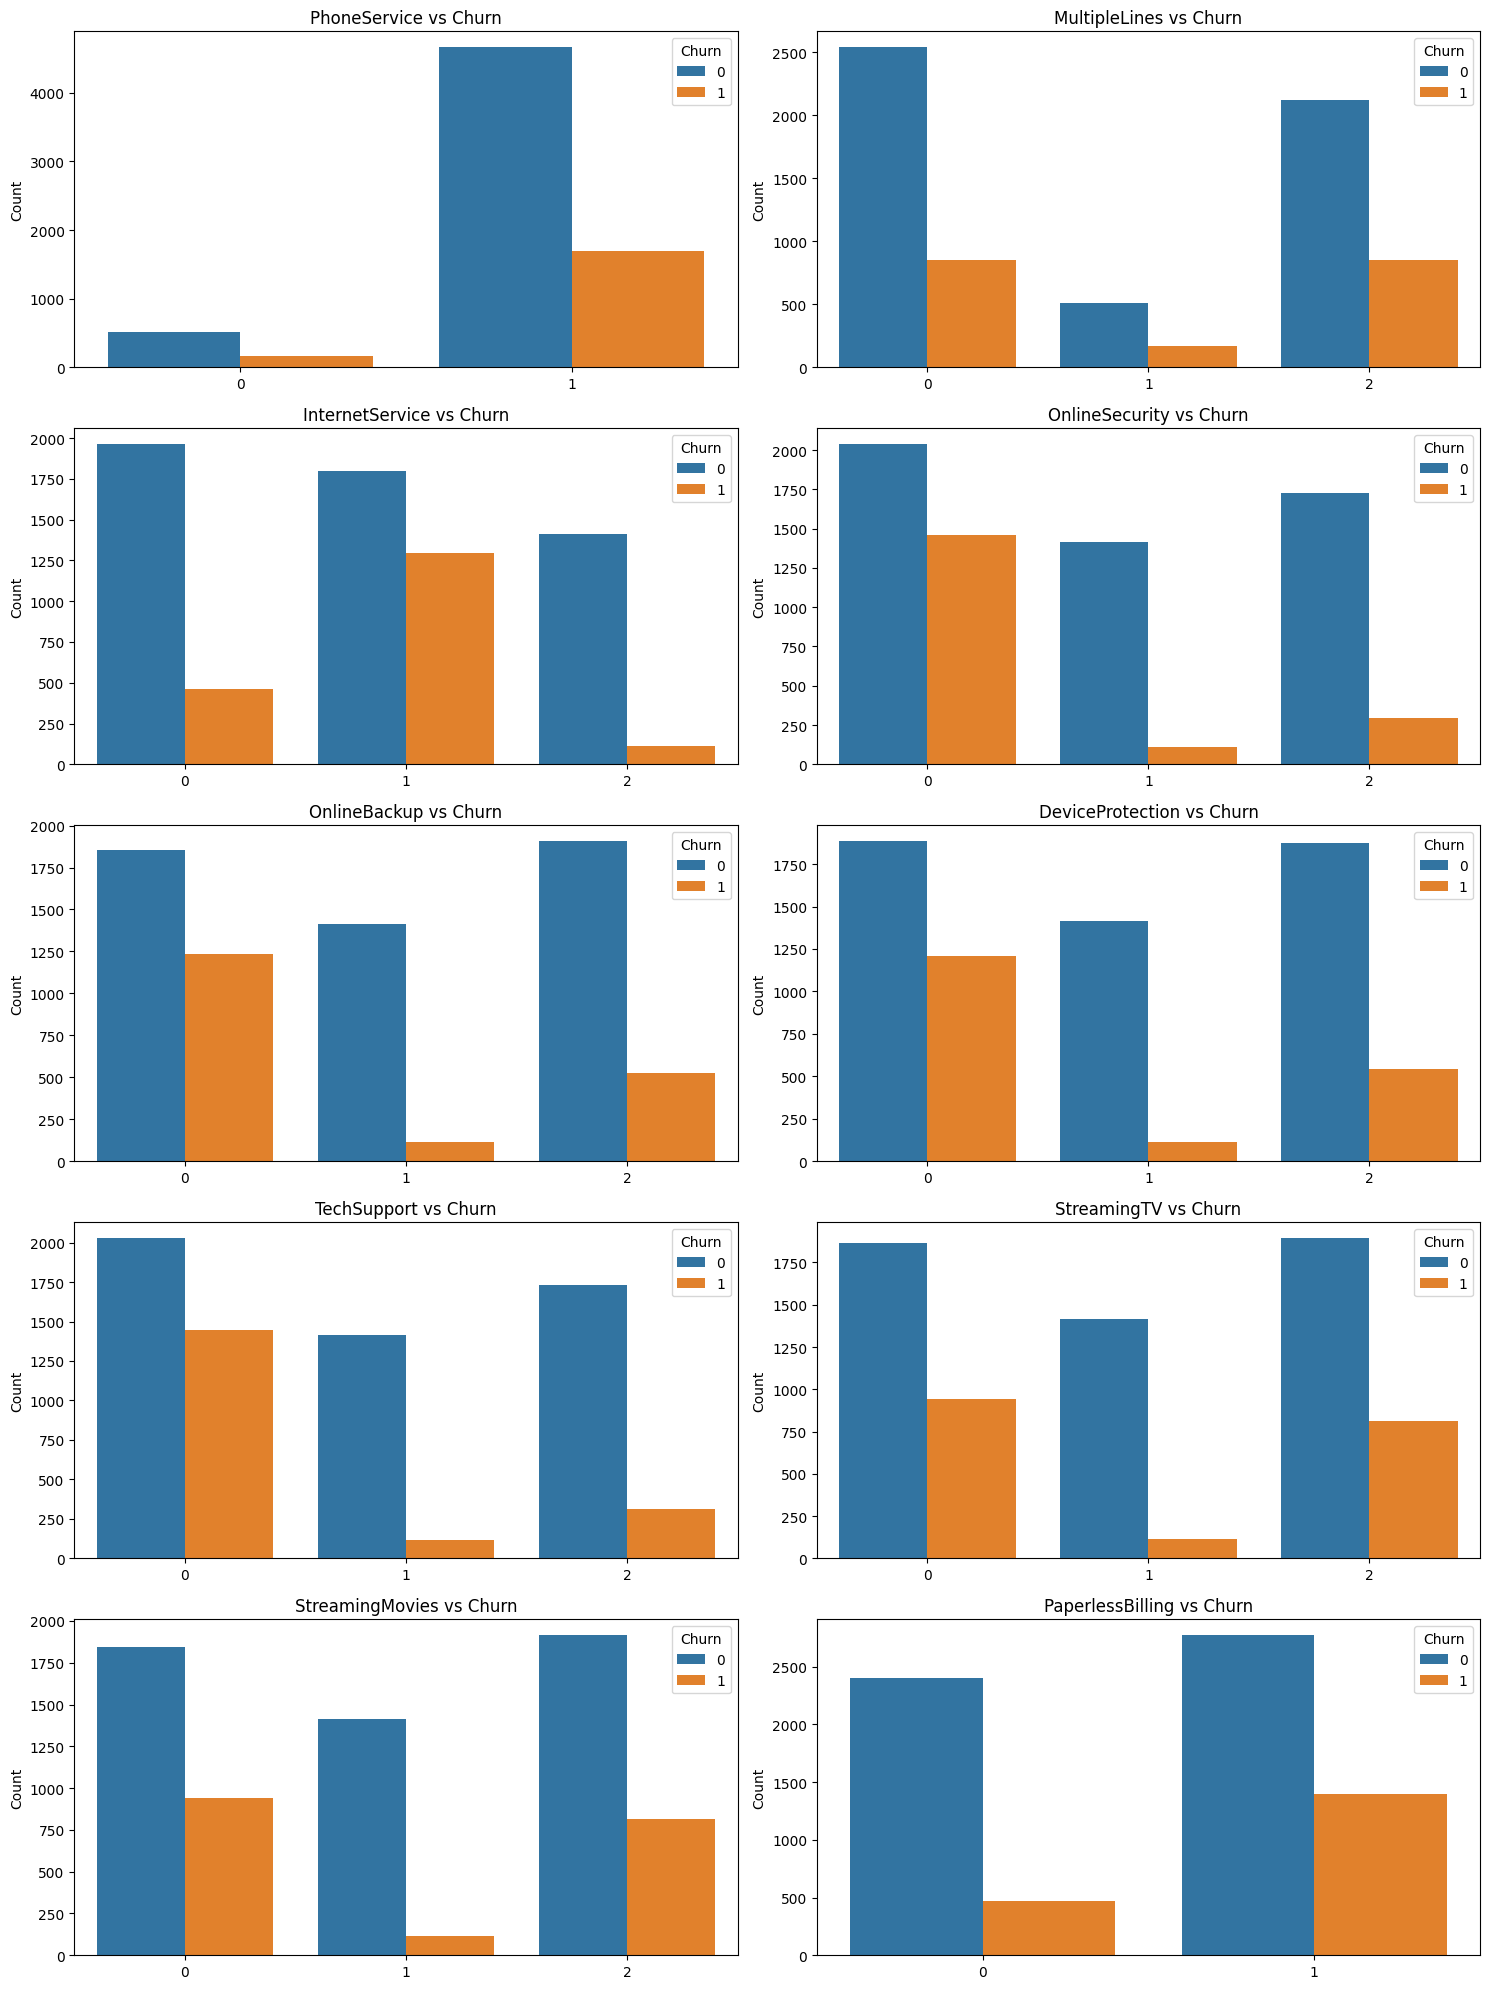

In [976]:
plt.figure(figsize=(15, 20))

for i, col in enumerate(service_columns, 1):
    plt.subplot(5, 2, i)
    sns.countplot(data=data, x=col, hue='Churn')
    plt.title(f'{col} vs Churn')
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

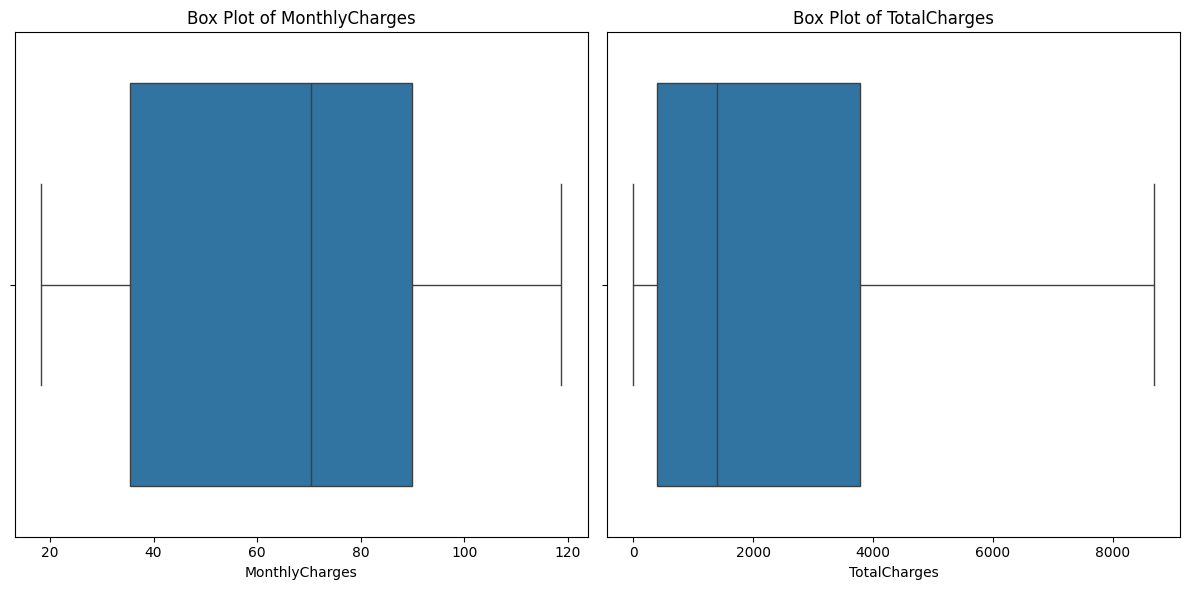

In [977]:
numerical_features = ['MonthlyCharges', 'TotalCharges',]  

plt.figure(figsize=(12, 6))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, len(numerical_features), i)
    sns.boxplot(data=data, x=feature)
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

In [978]:
data = pd.read_csv(r'E:\data science\projact\Telecom Customers Churn\Telecom Customers Churn.csv')
# Convert 'TotalCharges' to numeric, coerce errors to NaN, and handle missing values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data = data.dropna(subset=['TotalCharges'])  # Dropping rows with missing TotalCharges

# Drop customerID (not useful for prediction)
data = data.drop('customerID', axis=1)

In [979]:
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    if column != 'Churn':  # Skip encoding for target column
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le


In [980]:
# Encode target variable (Churn)
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)


In [981]:
# Split the dataset into features (X) and target (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

In [982]:
#Standardize numerical features
scaler = StandardScaler()
X[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X[['tenure', 'MonthlyCharges', 'TotalCharges']])
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)


# 2. Churn Prediction (Supervised Learning)


In [983]:
# Check class distribution in y_train
unique_classes, class_counts = np.unique(y_train, return_counts=True)
print(f"Classes: {unique_classes}")
print(f"Counts: {class_counts}")

# If there is an imbalance or only one class in y_train, resplit the data using stratify
if len(unique_classes) < 2:
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Now try resampling again if necessary
if len(np.unique(y_train)) > 1:
    from imblearn.over_sampling import SMOTE
    smote = SMOTE()
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


Classes: [0 1]
Counts: [4130 1495]


In [984]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)


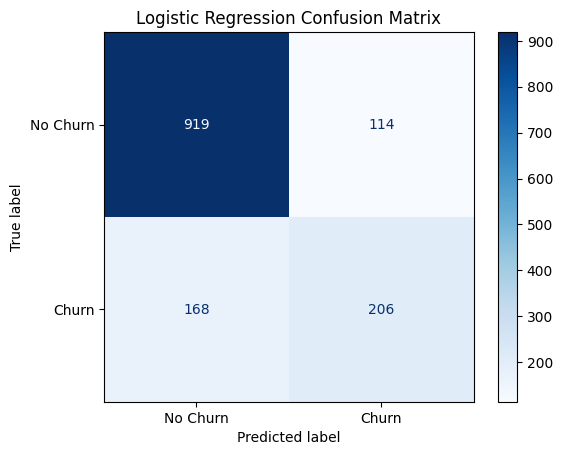

In [985]:
conf_matrix_log_reg = confusion_matrix(y_test, lr_pred)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_log_reg, display_labels=['No Churn', 'Churn'])
disp_log_reg.plot(cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


In [986]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

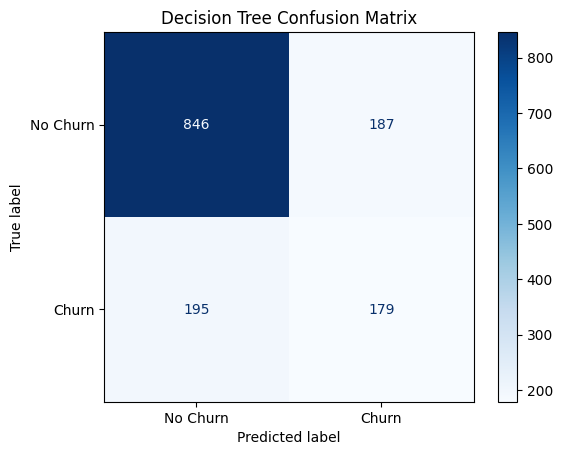

In [987]:
conf_matrix_dt = confusion_matrix(y_test, dt_pred)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dt, display_labels=['No Churn', 'Churn'])
disp_dt.plot(cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()


In [988]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print(rf_pred)

[0 0 0 ... 0 0 0]


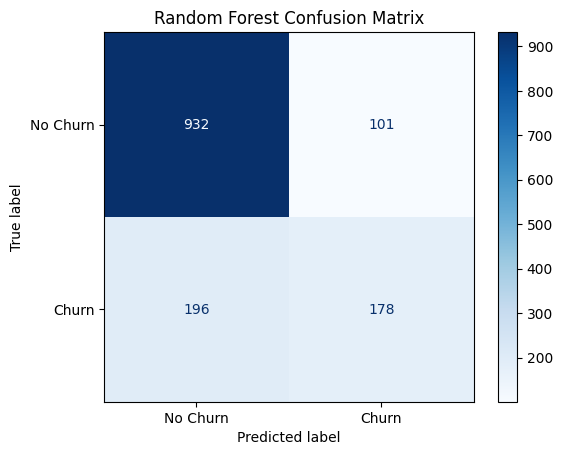

In [989]:
conf_matrix_rf = confusion_matrix(y_test, rf_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=['No Churn', 'Churn'])
disp_rf.plot(cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()


In [990]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


In [991]:
accuracy_rf = accuracy_score(y_test_encoded, rf_pred)
precision_rf = precision_score(y_test_encoded, rf_pred, pos_label=1)  # Assuming '1' is the churn label
recall_rf = recall_score(y_test_encoded, rf_pred, pos_label=1)
f1_rf = f1_score(y_test_encoded, rf_pred, pos_label=1)


In [992]:
feature_importances = rf_model.feature_importances_
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(features_df)


             Feature  Importance
18      TotalCharges    0.187597
17    MonthlyCharges    0.177935
4             tenure    0.161090
14          Contract    0.082863
16     PaymentMethod    0.049397
8     OnlineSecurity    0.047554
11       TechSupport    0.041736
7    InternetService    0.027836
0             gender    0.027686
9       OnlineBackup    0.026918
15  PaperlessBilling    0.024633
2            Partner    0.023243
6      MultipleLines    0.022706
10  DeviceProtection    0.020913
1      SeniorCitizen    0.019502
3         Dependents    0.019409
13   StreamingMovies    0.016968
12       StreamingTV    0.016834
5       PhoneService    0.005179


C:\Users\AL-MOSTAFA\AppData\Local\Temp\ipykernel_18372\1357903487.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




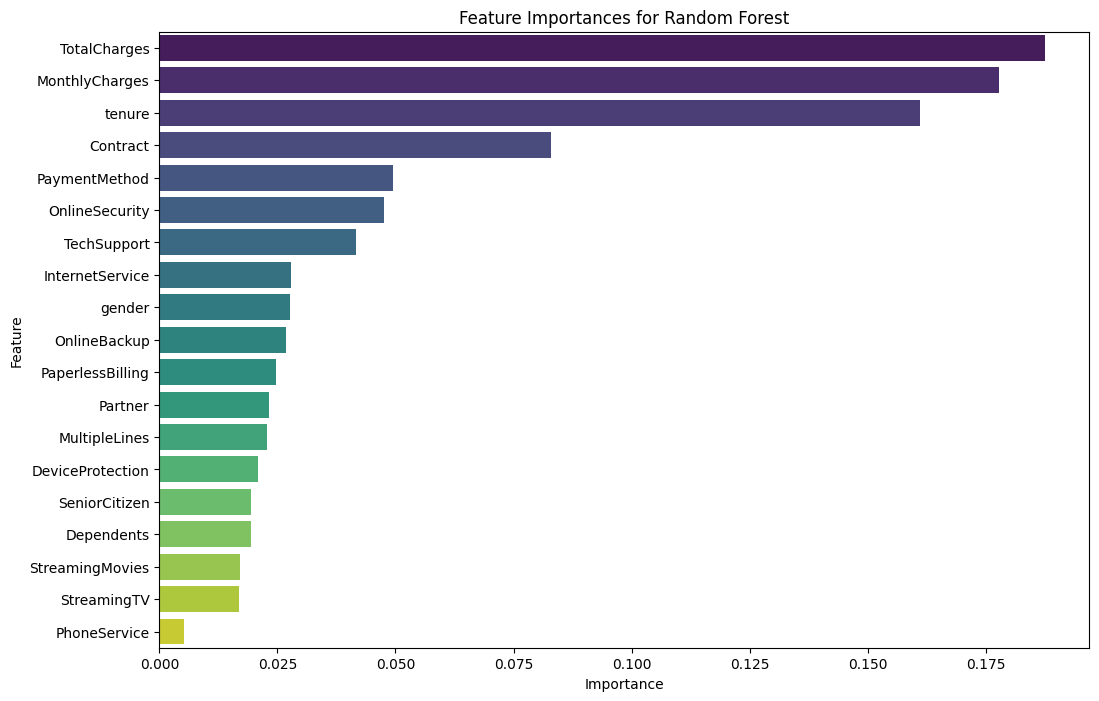

In [993]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')
plt.title('Feature Importances for Random Forest')
plt.show()


In [994]:
# Function to evaluate models
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    return accuracy, precision, recall, f1, roc_auc


In [995]:
# Evaluating models
lr_eval = evaluate_model(y_test, lr_pred)
dt_eval = evaluate_model(y_test, dt_pred)
rf_eval = evaluate_model(y_test, rf_pred)


In [996]:
# Display evaluation results
print(f"Logistic Regression: Accuracy={lr_eval[0]}, Precision={lr_eval[1]}, Recall={lr_eval[2]}, F1-Score={lr_eval[3]}, ROC-AUC={lr_eval[4]}")
print(f"Decision Tree: Accuracy={dt_eval[0]}, Precision={dt_eval[1]}, Recall={dt_eval[2]}, F1-Score={dt_eval[3]}, ROC-AUC={dt_eval[4]}")
print(f"Random Forest: Accuracy={rf_eval[0]}, Precision={rf_eval[1]}, Recall={rf_eval[2]}, F1-Score={rf_eval[3]}, ROC-AUC={rf_eval[4]}")


Logistic Regression: Accuracy=0.7995735607675906, Precision=0.64375, Recall=0.5508021390374331, F1-Score=0.5936599423631124, ROC-AUC=0.7202219794896749
Decision Tree: Accuracy=0.728500355366027, Precision=0.4890710382513661, Recall=0.4786096256684492, F1-Score=0.4837837837837838, ROC-AUC=0.6487917441023756
Random Forest: Accuracy=0.7889125799573561, Precision=0.6379928315412187, Recall=0.47593582887700536, F1-Score=0.5451761102603369, ROC-AUC=0.689081176781194


In [997]:
if len(np.unique(y_train)) > 1:
    from imblearn.over_sampling import SMOTE
    smote = SMOTE()
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [998]:
X_train_smt,X_test_smt,y_train_smt,y_test_smt=train_test_split(X_train_resampled,y_train_resampled,test_size=0.25,random_state=42)
classifier_smt=RandomForestClassifier(n_estimators=100,criterion='gini')
classifier_smt.fit(X_train_smt,y_train_smt)

RandomForestClassifier()

In [999]:
y_predict_smt=classifier_smt.predict(X_train_resampled)
print(accuracy_score(y_train_resampled,y_predict_smt))

0.9577481840193705


In [1000]:
from sklearn.metrics import classification_report
print(classification_report(y_train_resampled,y_predict_smt))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      4130
           1       0.95      0.97      0.96      4130

    accuracy                           0.96      8260
   macro avg       0.96      0.96      0.96      8260
weighted avg       0.96      0.96      0.96      8260



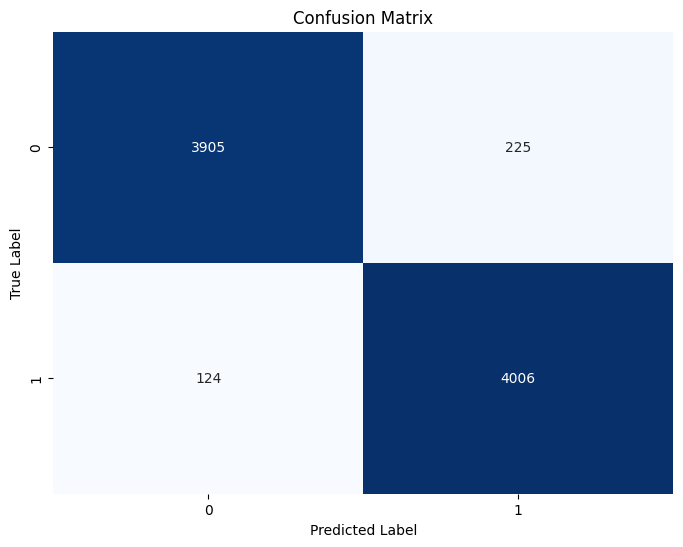

In [1001]:
# print(confusion_matrix(y_test,y_pred))
cm=confusion_matrix(y_train_resampled,y_predict_smt)

plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# prediction

In [1002]:
# Save Logistic Regression prediction
lr_pred_test = lr_model.predict(X_test)

test_results = X_test.copy()
test_results['Predicted_Churn'] = lr_pred_test
test_results['Actual_Churn'] = y_test.values  # Include the actual churn values for comparison

# Save the predictions to a CSV file
test_results.to_csv('telecom_churn_test_predictionss.csv', index=False)

In [1003]:
 # Initialize and train the RandomForestClassifier
classifier_smt = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
classifier_smt.fit(X_train_smt, y_train_smt)

    # Predict on the test set
y_predict_smt = classifier_smt.predict(X_test_smt)
    # Prepare test results DataFrame
test_results = X_test_smt.copy()
test_results['Predicted_Churn'] = y_predict_smt
test_results['Actual_Churn'] = y_test_smt

    # Save predictions to a CSV file
test_results.to_csv('telecom_churn_test_predictions(SMOTE).csv', index=False)


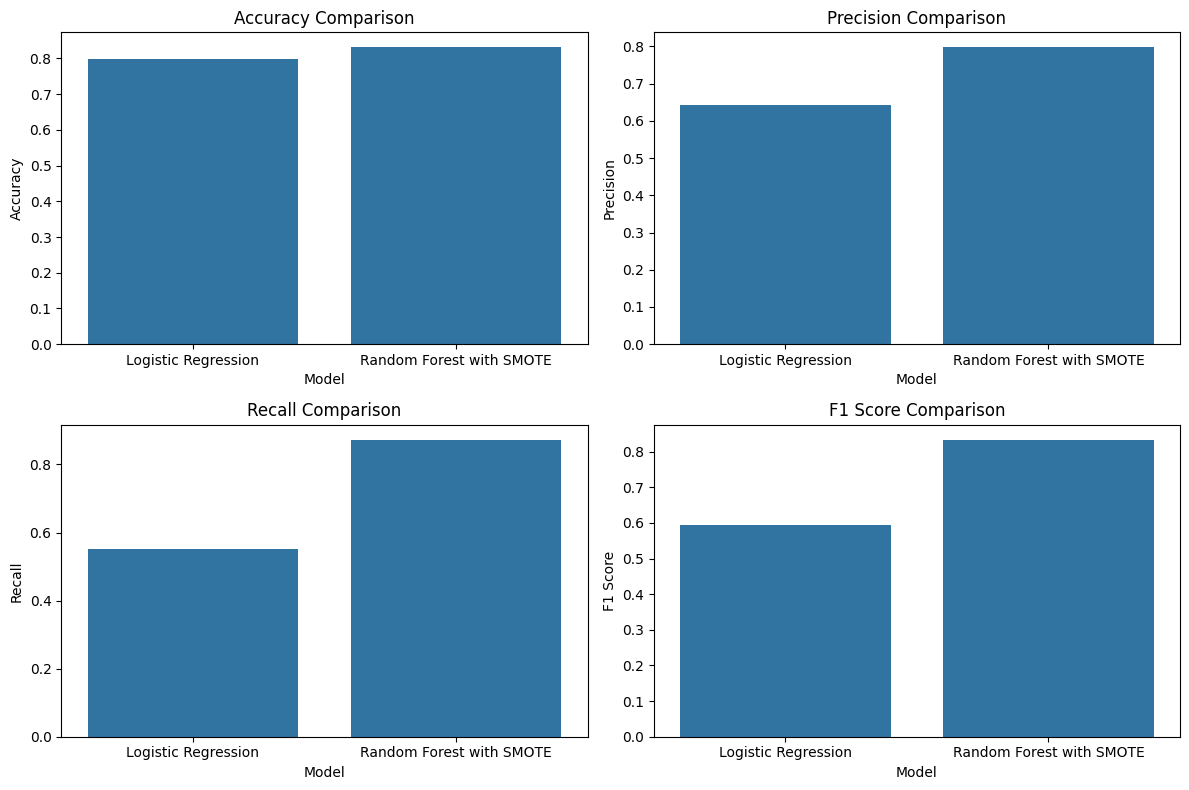

In [1004]:
metrics = {
    "Model": ["Logistic Regression", "Random Forest with SMOTE"],
    "Accuracy": [accuracy_score(y_test, lr_pred_test), accuracy_score(y_test_smt, y_predict_smt)],
    "Precision": [precision_score(y_test, lr_pred_test), precision_score(y_test_smt, y_predict_smt)],
    "Recall": [recall_score(y_test, lr_pred_test), recall_score(y_test_smt, y_predict_smt)],
    "F1 Score": [f1_score(y_test, lr_pred_test), f1_score(y_test_smt, y_predict_smt)]
}

metrics_df = pd.DataFrame(metrics)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.barplot(x="Model", y="Accuracy", data=metrics_df)
plt.title("Accuracy Comparison")

plt.subplot(2, 2, 2)
sns.barplot(x="Model", y="Precision", data=metrics_df)
plt.title("Precision Comparison")

plt.subplot(2, 2, 3)
sns.barplot(x="Model", y="Recall", data=metrics_df)
plt.title("Recall Comparison")

plt.subplot(2, 2, 4)
sns.barplot(x="Model", y="F1 Score", data=metrics_df)
plt.title("F1 Score Comparison")

plt.tight_layout()
plt.show()


In [1005]:

results_smote = pd.read_csv(r'E:\data science\projact\Telecom Customers Churn\telecom_churn_test_predictions(SMOTE).csv')
results_lr = pd.read_csv(r'E:\data science\projact\Telecom Customers Churn\telecom_churn_test_predictionss.csv')

print("Results with SMOTE:")
print(results_smote.head())

print("Results without SMOTE:")
print(results_lr.head())


Results with SMOTE:
   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        0           0 -0.743927             1   
1       0              0        0           0 -0.709833             1   
2       0              0        1           0  0.879182             1   
3       1              0        1           1  0.064303             1   
4       1              0        0           1 -0.791321             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
0              0                1               2             0  ...   
1              2                1               0             2  ...   
2              2                1               2             2  ...   
3              0                1               0             0  ...   
4              0                0               0             0  ...   

   TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0            2            2     

In [1006]:

y_true_smote = results_smote['Actual_Churn']
y_pred_smote = results_smote['Predicted_Churn']

y_true_lr = results_lr['Actual_Churn']
y_pred_lr = results_lr['Predicted_Churn']

metrics_smote = {
    "Accuracy": accuracy_score(y_true_smote, y_pred_smote),
    "Precision": precision_score(y_true_smote, y_pred_smote),
    "Recall": recall_score(y_true_smote, y_pred_smote),
    "F1 Score": f1_score(y_true_smote, y_pred_smote)
}

metrics_lr = {
    "Accuracy": accuracy_score(y_true_lr, y_pred_lr),
    "Precision": precision_score(y_true_lr, y_pred_lr),
    "Recall": recall_score(y_true_lr, y_pred_lr),
    "F1 Score": f1_score(y_true_lr, y_pred_lr)
}

print("Metrics with SMOTE:", metrics_smote)
print("Metrics without SMOTE:", metrics_lr)


Metrics with SMOTE: {'Accuracy': 0.8314769975786925, 'Precision': 0.797804208600183, 'Recall': 0.8728728728728729, 'F1 Score': 0.8336520076481836}
Metrics without SMOTE: {'Accuracy': 0.7995735607675906, 'Precision': 0.64375, 'Recall': 0.5508021390374331, 'F1 Score': 0.5936599423631124}


# 3. Customer Segmentation (Unsupervised Learning)


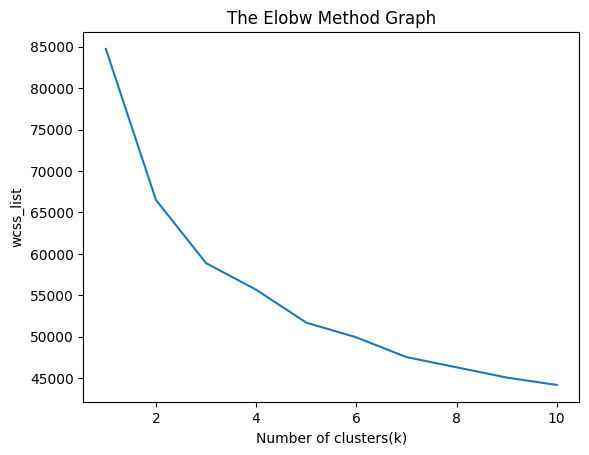

In [1007]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(X)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

In [1025]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X)

In [1026]:
# Add cluster information to the dataset
data['Cluster'] = clusters

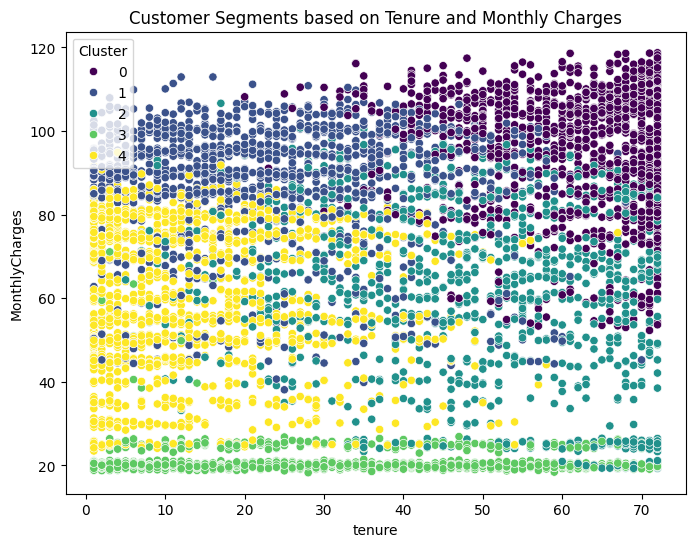

In [1027]:
# Visualize clusters based on two features (tenure and MonthlyCharges)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Cluster', data=data, palette='viridis')
plt.title('Customer Segments based on Tenure and Monthly Charges')
plt.show()

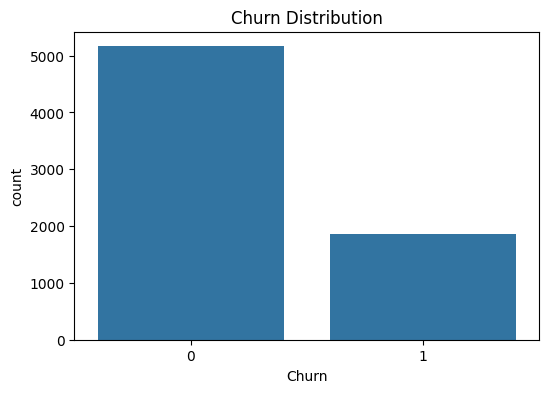

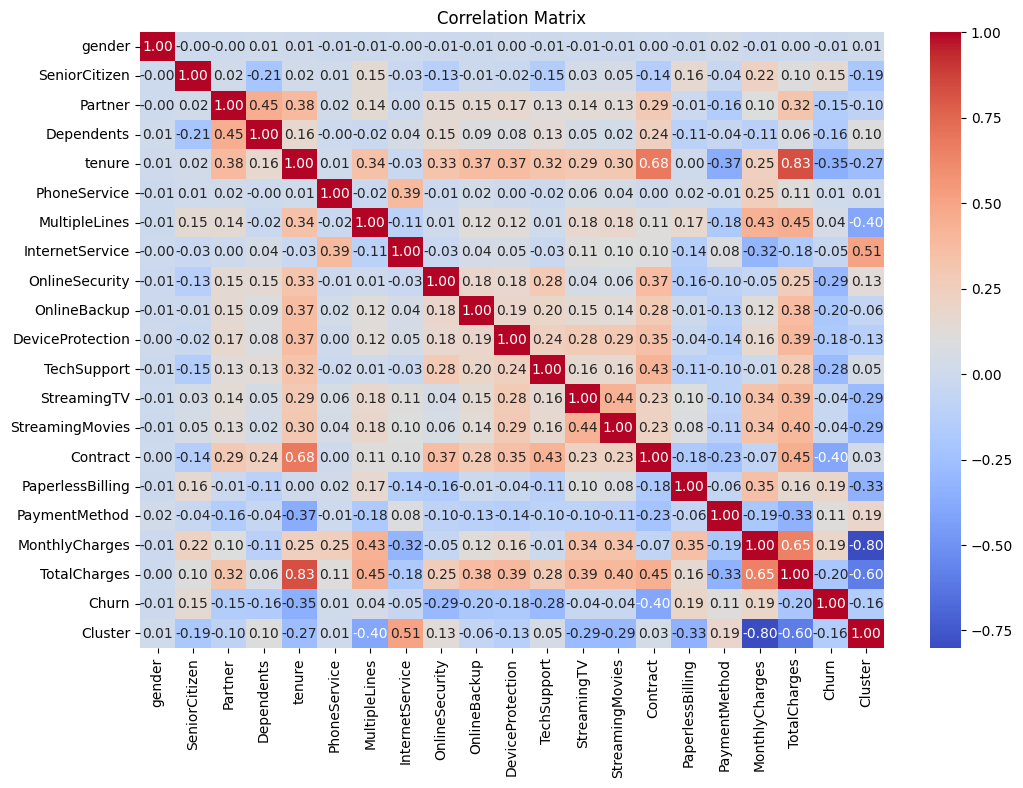

In [1011]:

# Churn distribution visualization
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [1012]:
# Import additional libraries for advanced feature engineering and visualization
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, AgglomerativeClustering
import plotly.express as px


# 1. Advanced Feature Engineering


In [1013]:
# Create a new feature - 'Monthly Tenure Ratio' (total charges divided by tenure)
data['MonthlyTenureRatio'] = data['TotalCharges'] / (data['tenure'] + 1)  # Avoid division by zero


In [1014]:
# Another feature example - Binary variable for high spenders
data['HighSpender'] = data['MonthlyCharges'].apply(lambda x: 1 if x > data['MonthlyCharges'].median() else 0)


In [1015]:
# Optional: Apply Principal Component Analysis (PCA) for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for easier visualization
X_pca = pca.fit_transform(X)

# 2. Exploring Different Clustering Algorithms


In [1016]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X_pca)


In [1017]:
# Hierarchical Clustering
agg_cluster = AgglomerativeClustering(n_clusters=4)
agg_clusters = agg_cluster.fit_predict(X_pca)


In [1018]:
# Add these clusters back to the dataset for visualization
data['DBSCAN_Cluster'] = dbscan_clusters
data['Agg_Cluster'] = agg_clusters


# 3. Advanced Visualization using Plotly


In [1019]:
fig = px.scatter(x=X_pca[:, 0], y=X_pca[:, 1], color=data['Agg_Cluster'], 
                 title="Customer Segments Based on PCA (Agglomerative Clustering)",
                 labels={'x': 'PCA Dimension 1', 'y': 'PCA Dimension 2'})
fig.show()

In [1020]:
# Another interactive plot for DBSCAN clusters
fig_dbscan = px.scatter(x=X_pca[:, 0], y=X_pca[:, 1], color=data['DBSCAN_Cluster'], 
                        title="Customer Segments Based on PCA (DBSCAN Clustering)",
                        labels={'x': 'PCA Dimension 1', 'y': 'PCA Dimension 2'})
fig_dbscan.show()

# 4. Novel Insights


In [1021]:
# Insights based on churn prediction and clustering

# Identifying upselling opportunities for customers in specific segments (e.g., high tenure, low churn)
high_value_segment = data[(data['tenure'] > data['tenure'].mean()) & (data['Churn'] == 0)]


In [1022]:
# Retention strategy example: Find clusters with high churn rate
churn_rate_per_cluster = data.groupby('Agg_Cluster')['Churn'].mean()
high_risk_clusters = churn_rate_per_cluster[churn_rate_per_cluster > 0.5]


In [1023]:
# Print actionable insights
print(f"High-value customers for upselling opportunities (non-churn, long tenure): {high_value_segment.shape[0]}")
print(f"High-risk churn segments (churn rate > 50%):\n{high_risk_clusters}")

# Churn correlation with high spending
print(f"Correlation between high spending and churn:\n{data[['HighSpender', 'Churn']].corr()}")


High-value customers for upselling opportunities (non-churn, long tenure): 2859
High-risk churn segments (churn rate > 50%):
Series([], Name: Churn, dtype: float64)
Correlation between high spending and churn:
             HighSpender     Churn
HighSpender     1.000000  0.195273
Churn           0.195273  1.000000


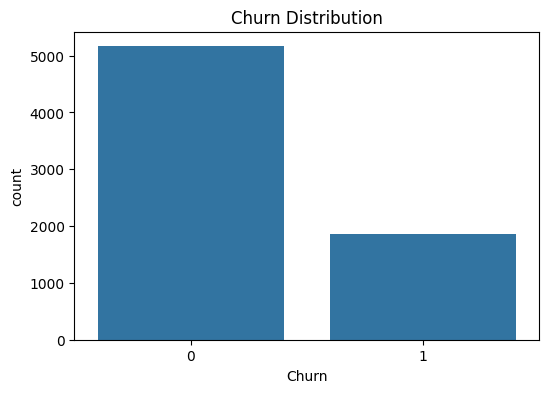

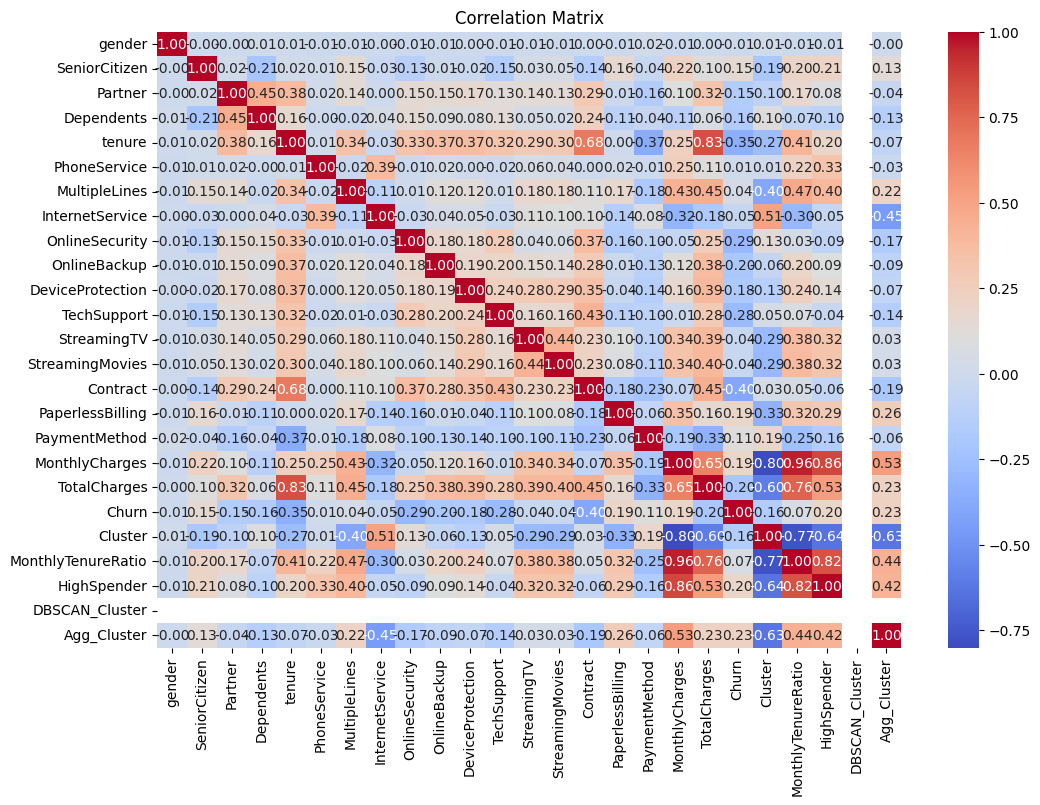

In [1024]:

# Churn distribution visualization
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()